<a href="https://colab.research.google.com/github/ujjwalbb30/CMSC_678_ASL_image_classification_ML/blob/main/python_notebooks/Part_2_2_CNN_Swish_ASL_Image_Classification_Ujjwal_PF10610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifiying American Sign Language (ASL) images using Covolutional Neural Network (CNN) models**
# **Activation Function : 'swish'**

In this notebook, I will be training 10 different CNN models to classify ASL images. I will mainly use 'swish' activation function in the hidden layers. I will be conducting following experiments in this notebook:

▶ 5 different CNN models (with 1 Convolutional layer, 1 MaxPooling layer and 1 Dropout Layer) will be trained with following kernel sizes:

>(a) (4,4)

>(b) (5,5)

>(c) (6,6)

>(d) (7,7)

>(e) (8,8)

▶ For each kernel size mentioned above, 1 more type of CNN model (having the following characteristics), will be trained:

>(a) 2 Convolutional layers, 2 Maxpooling layers and 2 Dropout layers

▶ In total, 10 models will be trained and following metrics will be calculated for each model along with Confusion matrix:

> (a) Accuracy

> (b) Precision

> (c) Recall

> (d) F1-score

## **Importing required libraries and data**

In [ ]:
# installing split-folders library to split the images dataset folders into training, validation and testing folders
!pip install split-folders

###**Importing required libraries**

In [ ]:
# importing required dependencies

# importing pandas, numpy, random, matplotlib and their required modules
import pandas as pd
import numpy as np
import random
from numpy.random import seed
seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# importing tensorflow, keras and their required modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import Adam

# importing sklearn and their required modules
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay

# importing other required libraries
import glob
import cv2
import skimage
from skimage.transform import resize
import os
import gc

import splitfolders

###**Mounting the drive and copying the data to allocated machine**

In [ ]:
# mounting the drive to access data files
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# defining the path of data in drive (path to copy the data from)
# defining the path where the data should be copied
drive_path = '/content/gdrive/MyDrive/CMSC_678/ML_Project/dataset'
local_path = '/content'

# copying the data from drive to machine
!cp -av '/content/gdrive/MyDrive/CMSC_678/ML_Project/dataset' '/content'

Streaming output truncated to the last 5000 lines.
'/content/gdrive/MyDrive/CMSC_678/ML_Project/dataset/asl_alphabet_train/Y/Y1898.jpg' -> '/content/dataset/asl_alphabet_train/Y/Y1898.jpg'
'/content/gdrive/MyDrive/CMSC_678/ML_Project/dataset/asl_alphabet_train/Y/Y1904.jpg' -> '/content/dataset/asl_alphabet_train/Y/Y1904.jpg'
'/content/gdrive/MyDrive/CMSC_678/ML_Project/dataset/asl_alphabet_train/Y/Y1890.jpg' -> '/content/dataset/asl_alphabet_train/Y/Y1890.jpg'
'/content/gdrive/MyDrive/CMSC_678/ML_Project/dataset/asl_alphabet_train/Y/Y1880.jpg' -> '/content/dataset/asl_alphabet_train/Y/Y1880.jpg'
'/content/gdrive/MyDrive/CMSC_678/ML_Project/dataset/asl_alphabet_train/Y/Y1908.jpg' -> '/content/dataset/asl_alphabet_train/Y/Y1908.jpg'
'/content/gdrive/MyDrive/CMSC_678/ML_Project/dataset/asl_alphabet_train/Y/Y1888.jpg' -> '/content/dataset/asl_alphabet_train/Y/Y1888.jpg'
'/content/gdrive/MyDrive/CMSC_678/ML_Project/dataset/asl_alphabet_train/Y/Y1876.jpg' -> '/content/dataset/asl_alphabet_tr

###**Defining the swish activation function**

In [ ]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [ ]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

###**Splitting the images dataset folder into train, validation and test images**
###**creating train, validation and test dataframes of image paths and labels**

In [ ]:
# splitting the folder intro training, validation and test dataset
splitfolders.ratio("/content/dataset/asl_alphabet_train", output="/content/dataset/split_dataset", seed=42, ratio=(.7, .1, .2), group_prefix=None)

Copying files: 87020 files [00:16, 5408.06 files/s]


In [ ]:
# Exploring the new created split dataset folder
dataset_folder_path = '/content/dataset/split_dataset'
for path, directories, files in os.walk(dataset_folder_path):
    print(path,'--> number of files : ', len(files))

/content/dataset/split_dataset --> number of files :  0
/content/dataset/split_dataset/test --> number of files :  0
/content/dataset/split_dataset/test/X --> number of files :  600
/content/dataset/split_dataset/test/J --> number of files :  600
/content/dataset/split_dataset/test/G --> number of files :  600
/content/dataset/split_dataset/test/D --> number of files :  600
/content/dataset/split_dataset/test/A --> number of files :  600
/content/dataset/split_dataset/test/R --> number of files :  600
/content/dataset/split_dataset/test/N --> number of files :  602
/content/dataset/split_dataset/test/T --> number of files :  600
/content/dataset/split_dataset/test/B --> number of files :  600
/content/dataset/split_dataset/test/H --> number of files :  600
/content/dataset/split_dataset/test/W --> number of files :  600
/content/dataset/split_dataset/test/E --> number of files :  600
/content/dataset/split_dataset/test/Q --> number of files :  600
/content/dataset/split_dataset/test/C 

In [ ]:
# Preparing train, validation and test dataframes of image paths and labels

# defining the path to train, validation and test images data folders
train_dataset_folder = '/content/dataset/split_dataset/train'
validation_dataset_folder = '/content/dataset/split_dataset/val'
test_dataset_folder = '/content/dataset/split_dataset/test'

# initializing empty lists to store paths and labels of train, validation and test images
train_data = []
val_data = []
test_data = []

# saving train images paths and labels
for folder in os.listdir(train_dataset_folder):
    label_folder = os.path.join(train_dataset_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    train_data += onlyfiles

# saving validation images paths and labels
for folder in os.listdir(validation_dataset_folder):
    label_folder = os.path.join(validation_dataset_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    val_data += onlyfiles

# saving test images paths and labels
for folder in os.listdir(test_dataset_folder):
    label_folder = os.path.join(test_dataset_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    test_data += onlyfiles

# creating dataframes from the lists
train_data_df = pd.DataFrame(train_data)
val_data_df = pd.DataFrame(val_data)
test_data_df = pd.DataFrame(test_data)

# viewing the details of training dataframe
print('training data:\n')
display(train_data_df)
print('\nunique labels:\n',train_data_df['label'].unique())
print('\n number of unique labels:\n',train_data_df['label'].nunique())

# viewing the details of validation dataframe
print('\nvalidation data:\n')
display(val_data_df)
print('\nunique labels:\n',val_data_df['label'].unique())
print('\n number of unique labels:\n',val_data_df['label'].nunique())

# viewing the details of testing dataframe
print('\ntesting data:\n')
display(test_data_df)
print('\nunique labels:\n',test_data_df['label'].unique())
print('\n number of unique labels:\n',test_data_df['label'].nunique())

training data:



label                                              path
0         X    /content/dataset/split_dataset/train/X/X74.jpg
1         X   /content/dataset/split_dataset/train/X/X502.jpg
2         X  /content/dataset/split_dataset/train/X/X2189.jpg
3         X  /content/dataset/split_dataset/train/X/X2330.jpg
4         X   /content/dataset/split_dataset/train/X/X250.jpg
...     ...                                               ...
60909     M  /content/dataset/split_dataset/train/M/M2725.jpg
60910     M  /content/dataset/split_dataset/train/M/M1168.jpg
60911     M  /content/dataset/split_dataset/train/M/M1072.jpg
60912     M  /content/dataset/split_dataset/train/M/M2842.jpg
60913     M  /content/dataset/split_dataset/train/M/M2745.jpg

[60914 rows x 2 columns]


unique labels:
 ['X' 'J' 'G' 'D' 'A' 'R' 'N' 'T' 'B' 'H' 'W' 'E' 'Q' 'C' 'space' 'del' 'P'
 'S' 'O' 'K' 'Z' 'U' 'L' 'V' 'nothing' 'F' 'I' 'Y' 'M']

 number of unique labels:
 29

validation data:



label                                            path
0        X  /content/dataset/split_dataset/val/X/X2630.jpg
1        X  /content/dataset/split_dataset/val/X/X1889.jpg
2        X  /content/dataset/split_dataset/val/X/X2532.jpg
3        X  /content/dataset/split_dataset/val/X/X1679.jpg
4        X   /content/dataset/split_dataset/val/X/X840.jpg
...    ...                                             ...
8697     M  /content/dataset/split_dataset/val/M/M1903.jpg
8698     M  /content/dataset/split_dataset/val/M/M1898.jpg
8699     M  /content/dataset/split_dataset/val/M/M1093.jpg
8700     M  /content/dataset/split_dataset/val/M/M2329.jpg
8701     M    /content/dataset/split_dataset/val/M/M52.jpg

[8702 rows x 2 columns]


unique labels:
 ['X' 'J' 'G' 'D' 'A' 'R' 'N' 'T' 'B' 'H' 'W' 'E' 'Q' 'C' 'space' 'del' 'P'
 'S' 'O' 'K' 'Z' 'U' 'L' 'V' 'nothing' 'F' 'I' 'Y' 'M']

 number of unique labels:
 29

testing data:



label                                             path
0         X   /content/dataset/split_dataset/test/X/X260.jpg
1         X   /content/dataset/split_dataset/test/X/X651.jpg
2         X  /content/dataset/split_dataset/test/X/X1917.jpg
3         X  /content/dataset/split_dataset/test/X/X1651.jpg
4         X  /content/dataset/split_dataset/test/X/X1820.jpg
...     ...                                              ...
17399     M   /content/dataset/split_dataset/test/M/M351.jpg
17400     M  /content/dataset/split_dataset/test/M/M2681.jpg
17401     M  /content/dataset/split_dataset/test/M/M2944.jpg
17402     M  /content/dataset/split_dataset/test/M/M2417.jpg
17403     M  /content/dataset/split_dataset/test/M/M1346.jpg

[17404 rows x 2 columns]


unique labels:
 ['X' 'J' 'G' 'D' 'A' 'R' 'N' 'T' 'B' 'H' 'W' 'E' 'Q' 'C' 'space' 'del' 'P'
 'S' 'O' 'K' 'Z' 'U' 'L' 'V' 'nothing' 'F' 'I' 'Y' 'M']

 number of unique labels:
 29


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


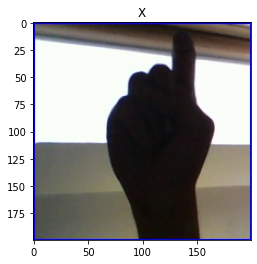

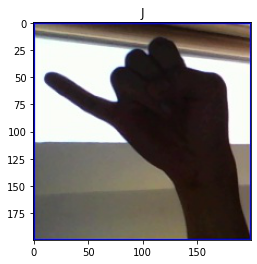

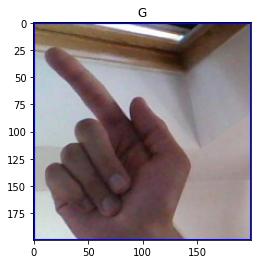

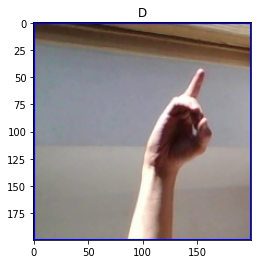

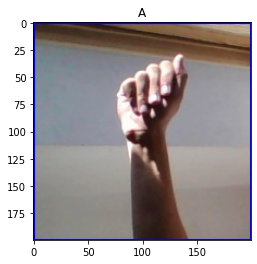

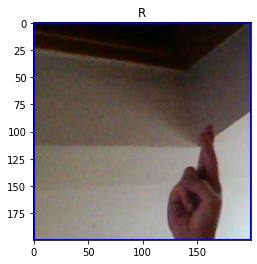

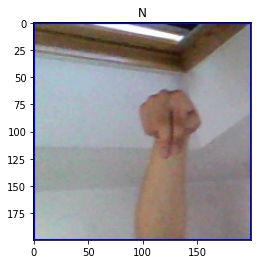

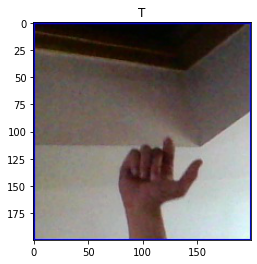

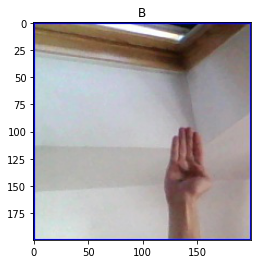

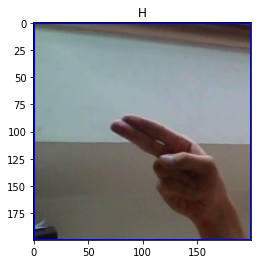

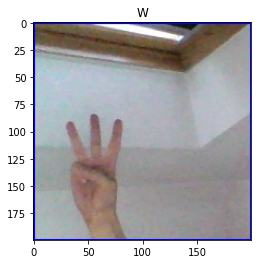

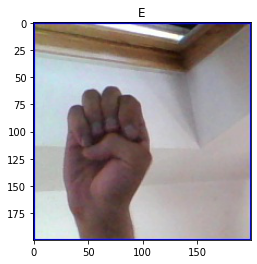

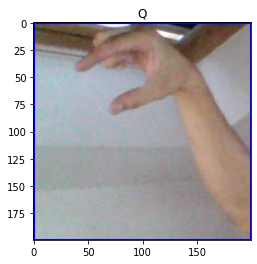

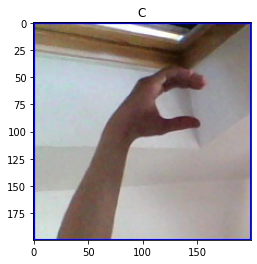

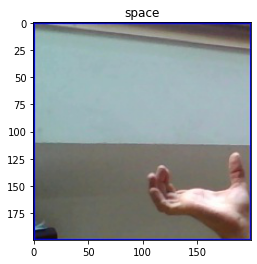

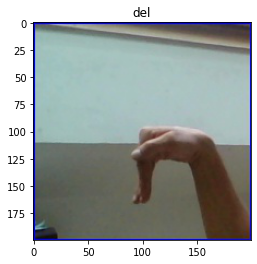

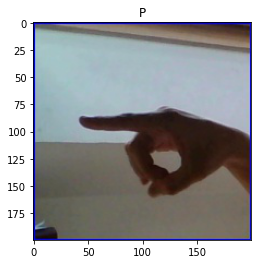

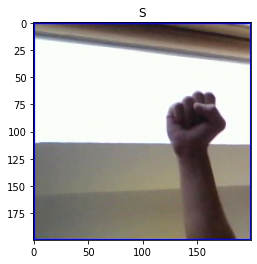

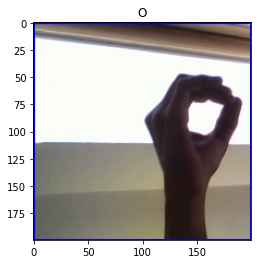

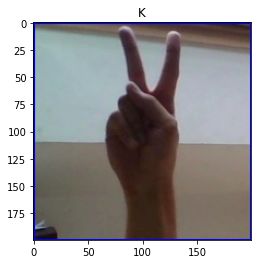

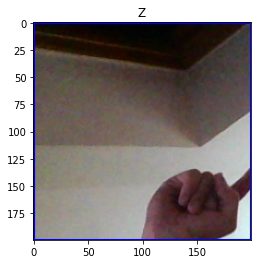

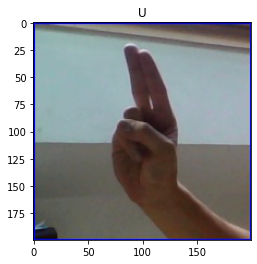

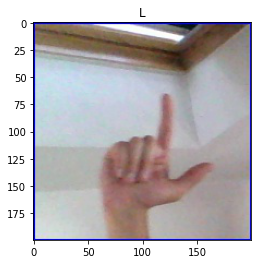

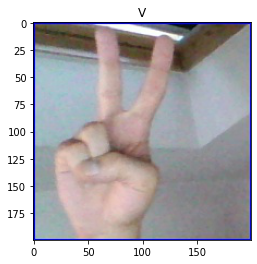

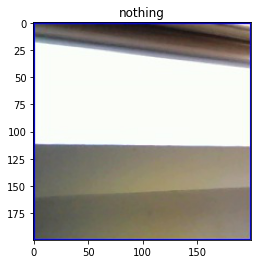

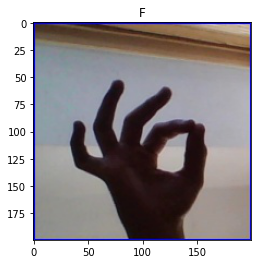

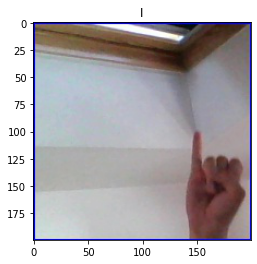

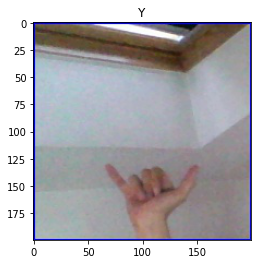

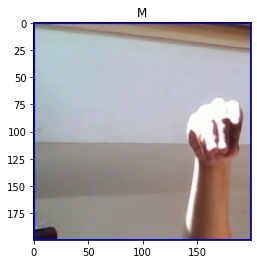

In [ ]:
# viewing random images of each label from train dataframe

unique_asl_signs = train_data_df['label'].unique().tolist()
images = []

for sign in unique_asl_signs:
    rows = train_data_df[train_data_df['label']==sign]['path']
    random_pick = random.randint(a=0, b=len(rows))
    filepath = rows.iloc[random_pick]
    img = mpimg.imread(filepath)
    plt.figure()
    plt.title(sign)
    plt.imshow(img)

In [ ]:
# viewing number of images in train dataset, validation dataset and test dataset
print(f'training data size: {len(train_data_df)}')
print(f'validation data size: {len(val_data_df)}')
print(f'testing data size: {len(test_data_df)}')

training data size: 60914
validation data size: 8702
testing data size: 17404


###**Creating image data generators for train, validation and test image dataset to feed the images to training models in batches**

In [ ]:
# creating image data generators

# defining image dimensions, batch size, target size of image, target dimensions and number of labels
img_dim = 64
batch_size = 64
target_size = (img_dim, img_dim)
target_dims = (img_dim, img_dim, 3)
num_classes = len(train_data_df['label'].unique())

# images are normalized, but not augmented

# train image generator
train_datagen = ImageDataGenerator(rescale = 1/255.0,horizontal_flip=True, vertical_flip=True,brightness_range=[0.2,1.0])
train_generator = train_datagen.flow_from_dataframe(dataframe=train_data_df,x_col='path', y_col='label', target_size=(img_dim, img_dim),class_mode='categorical', batch_size=batch_size, shuffle=False)

# validation image generator
validation_datagen = ImageDataGenerator(rescale = 1/255.0,horizontal_flip=True, vertical_flip=True,brightness_range=[0.2,1.0])
validation_generator = validation_datagen.flow_from_dataframe(dataframe=val_data_df, x_col='path', y_col='label', target_size=(img_dim, img_dim), class_mode='categorical', batch_size=batch_size, shuffle=False)

# testing image generator
test_datagen = ImageDataGenerator(rescale = 1/255.0,horizontal_flip=True, vertical_flip=True,brightness_range=[0.2,1.0])
test_generator = test_datagen.flow_from_dataframe(dataframe=test_data_df, x_col='path', y_col='label', target_size=(img_dim, img_dim), class_mode='categorical', batch_size=batch_size, shuffle=False)


Found 60914 validated image filenames belonging to 29 classes.
Found 8702 validated image filenames belonging to 29 classes.
Found 17404 validated image filenames belonging to 29 classes.


## **CNN Models with 1 Convolutional layer, 1 Maxpooling layer and 1 Dropout layer**

#### **Kernel size - (5,5)**

In [ ]:
# defining the model
model_1_1l = Sequential()

model_1_1l.add(Conv2D(32, kernel_size=(5,5), input_shape=target_dims))
model_1_1l.add(Activation('relu'))
model_1_1l.add(MaxPooling2D((2, 2)))
model_1_1l.add(Dropout(0.5))

model_1_1l.add(Flatten())
model_1_1l.add(Dropout(0.5))

model_1_1l.add(Dense(128, activation='swish'))

model_1_1l.add(Dense(num_classes, activation='softmax'))

model_1_1l.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation_1 (Activation)   (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dropout_1 (Dropout)         (None, 28800)             0         
                                                        

In [ ]:
# defining the Early Stopping policy
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
# compiling the model
model_1_1l.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting the model
model_1_1l.fit(train_generator, validation_data = validation_generator, epochs=10,verbose=1)

Epoch 1/10
952/952 [==============================] - 161s 168ms/step - loss: 3.2780 - accuracy: 0.0845 - val_loss: 2.9019 - val_accuracy: 0.1748
Epoch 2/10
952/952 [==============================] - 158s 166ms/step - loss: 2.6039 - accuracy: 0.2367 - val_loss: 2.1108 - val_accuracy: 0.3675
Epoch 3/10
952/952 [==============================] - 166s 174ms/step - loss: 2.0498 - accuracy: 0.3706 - val_loss: 1.7207 - val_accuracy: 0.4681
Epoch 4/10
952/952 [==============================] - 160s 167ms/step - loss: 1.6789 - accuracy: 0.4692 - val_loss: 1.2923 - val_accuracy: 0.6272
Epoch 5/10
952/952 [==============================] - 165s 173ms/step - loss: 1.4312 - accuracy: 0.5462 - val_loss: 1.1899 - val_accuracy: 0.6104
Epoch 6/10
952/952 [==============================] - 166s 174ms/step - loss: 1.2492 - accuracy: 0.5974 - val_loss: 0.9586 - val_accuracy: 0.7000
Epoch 7/10
952/952 [==============================] - 166s 175ms/step - loss: 1.1149 - accuracy: 0.6399 - val_loss: 0.8640 -

In [ ]:
# viewing the model history of loss, accuracy, val_loss, val_accuracy
metrics = pd.DataFrame(model_1_1l.history.history)
print("The model metrics are")
display(metrics)

The model metrics are


loss  accuracy  val_loss  val_accuracy
0  3.277957  0.084496  2.901871      0.174787
1  2.603907  0.236662  2.110812      0.367502
2  2.049780  0.370555  1.720683      0.468053
3  1.678948  0.469202  1.292343      0.627212
4  1.431205  0.546196  1.189948      0.610434
5  1.249173  0.597383  0.958635      0.699954
6  1.114928  0.639902  0.864036      0.730752
7  1.000975  0.673819  0.804729      0.725810
8  0.917612  0.697623  0.686590      0.786601
9  0.850539  0.717602  0.605814      0.794300

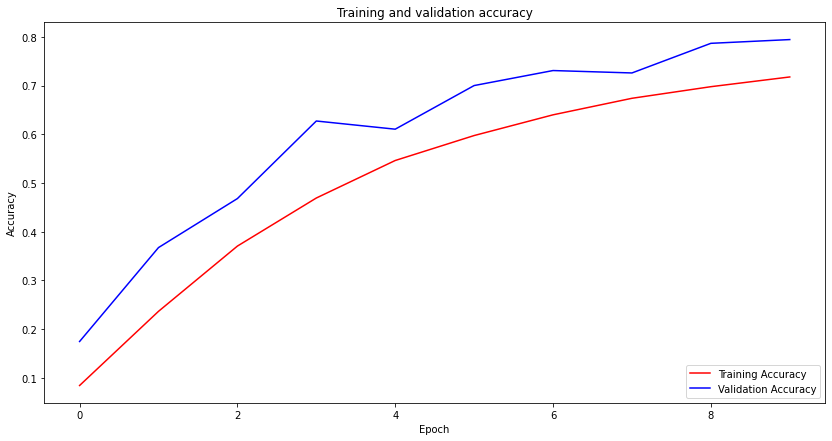

In [ ]:
# plotting training and validation accuracy against number of epochs
acc= model_1_1l.history.history['accuracy']
val_acc= model_1_1l.history.history['val_accuracy']
loss= model_1_1l.history.history['loss']
val_loss= model_1_1l.history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

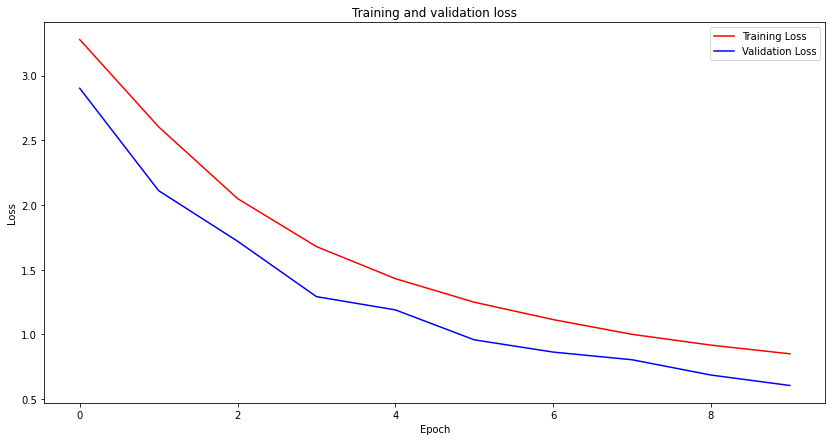

In [ ]:
# plotting training and validation loss against number of epochs
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
# evaluating the model's performance with test dataset
test_loss, test_acc = model_1_1l.evaluate(test_generator)
print('loss :' ,test_loss, 'acc :' ,test_acc)

272/272 [==============================] - 28s 103ms/step - loss: 0.6113 - accuracy: 0.7898
loss : 0.6113020181655884 acc : 0.7898184061050415


In [ ]:
# Viewing Precision, recall and f1-score for each of the label
# getting the predicted labels
predictions = model_1_1l.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1)

# getting the true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

272/272 [==============================] - 27s 99ms/step
              precision    recall  f1-score   support

           A       0.85      0.81      0.83       600
           B       0.83      0.88      0.85       600
           C       0.99      0.96      0.98       600
           D       0.97      0.91      0.94       600
           E       0.75      0.70      0.72       600
           F       0.95      0.92      0.93       600
           G       0.71      0.97      0.82       600
           H       0.96      0.71      0.81       600
           I       0.63      0.96      0.76       602
           J       0.94      0.94      0.94       600
           K       0.85      0.90      0.87       600
           L       0.94      0.92      0.93       600
           M       0.80      0.82      0.81       600
           N       0.93      0.71      0.81       602
           O       0.99      0.63      0.77       600
           P       0.84      0.93      0.88       600
           Q       0.93 

<Figure size 3600x3600 with 0 Axes>

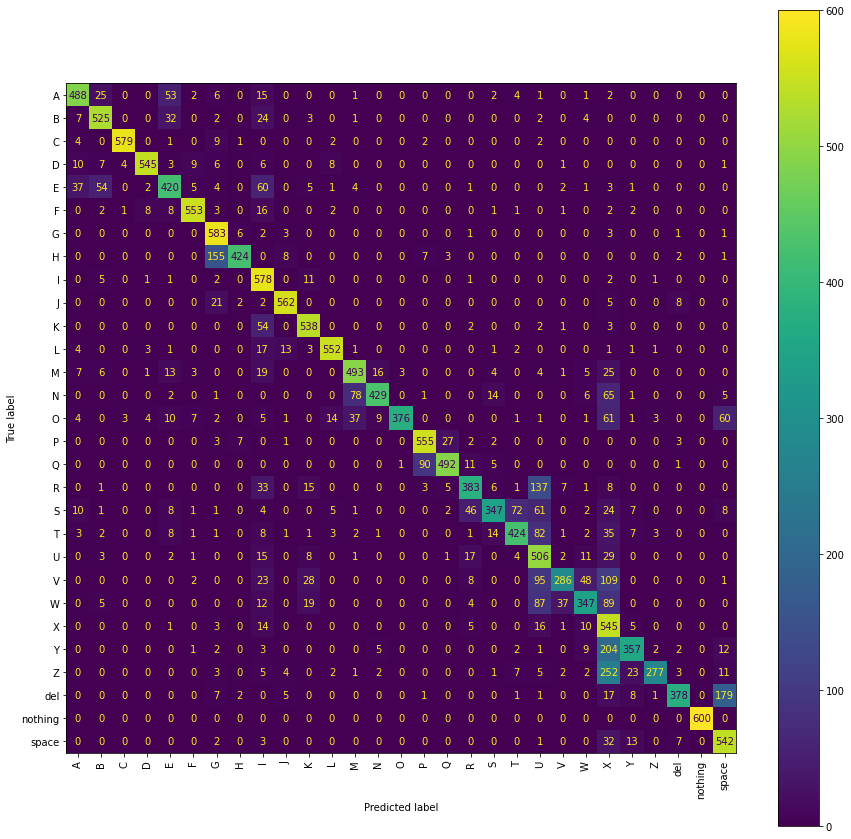

In [ ]:
# plotting the confusion matrix
plt.figure(figsize=(50,50))
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,xticks_rotation='vertical')

#### **Kernel size - (7,7)**

In [ ]:
# defining the model
model_2_1l = Sequential()

model_2_1l.add(Conv2D(32, kernel_size=(7,7), input_shape=target_dims))
model_2_1l.add(Activation('relu'))
model_2_1l.add(MaxPooling2D((2, 2)))
model_2_1l.add(Dropout(0.5))

model_2_1l.add(Flatten())
model_2_1l.add(Dropout(0.5))

model_2_1l.add(Dense(128, activation='swish'))

model_2_1l.add(Dense(num_classes, activation='softmax'))

model_2_1l.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        4736      
                                                                 
 activation_1 (Activation)   (None, 58, 58, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0         
                                                                 
 flatten (Flatten)           (None, 26912)             0         
                                                                 
 dropout_1 (Dropout)         (None, 26912)             0         
                                                        

In [ ]:
# defining the Early Stopping policy
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
# compiling the model
model_2_1l.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting the model
model_2_1l.fit(train_generator, validation_data = validation_generator, epochs=10,verbose=1)

Epoch 1/10
952/952 [==============================] - 108s 105ms/step - loss: 3.3805 - accuracy: 0.0341 - val_loss: 3.6883 - val_accuracy: 0.0368
Epoch 2/10
952/952 [==============================] - 99s 104ms/step - loss: 3.2172 - accuracy: 0.1036 - val_loss: 2.9883 - val_accuracy: 0.1709
Epoch 3/10
952/952 [==============================] - 98s 103ms/step - loss: 2.7538 - accuracy: 0.1965 - val_loss: 2.3695 - val_accuracy: 0.3019
Epoch 4/10
952/952 [==============================] - 103s 109ms/step - loss: 2.2832 - accuracy: 0.3055 - val_loss: 1.8279 - val_accuracy: 0.4582
Epoch 5/10
952/952 [==============================] - 99s 104ms/step - loss: 1.9755 - accuracy: 0.3939 - val_loss: 1.6926 - val_accuracy: 0.4674
Epoch 6/10
952/952 [==============================] - 99s 104ms/step - loss: 1.7503 - accuracy: 0.4544 - val_loss: 1.3905 - val_accuracy: 0.5722
Epoch 7/10
952/952 [==============================] - 97s 101ms/step - loss: 1.5864 - accuracy: 0.5007 - val_loss: 1.2874 - val_

In [ ]:
# viewing the model history of loss, accuracy, val_loss, val_accuracy
metrics = pd.DataFrame(model_2_1l.history.history)
print("The model metrics are")
display(metrics)

The model metrics are


loss  accuracy  val_loss  val_accuracy
0  3.380521  0.034064  3.688339      0.036773
1  3.217206  0.103589  2.988319      0.170880
2  2.753816  0.196523  2.369509      0.301885
3  2.283217  0.305480  1.827910      0.458171
4  1.975464  0.393900  1.692562      0.467364
5  1.750296  0.454444  1.390488      0.572167
6  1.586389  0.500706  1.287375      0.622501
7  1.442096  0.545605  1.085829      0.668582
8  1.330562  0.575927  1.011321      0.687658
9  1.230264  0.606691  0.940810      0.705355

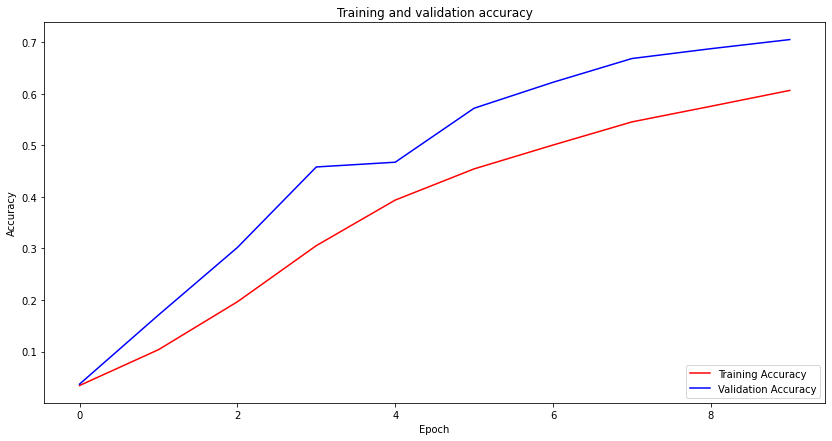

In [ ]:
# plotting training and validation accuracy against number of epochs
acc= model_2_1l.history.history['accuracy']
val_acc= model_2_1l.history.history['val_accuracy']
loss= model_2_1l.history.history['loss']
val_loss= model_2_1l.history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

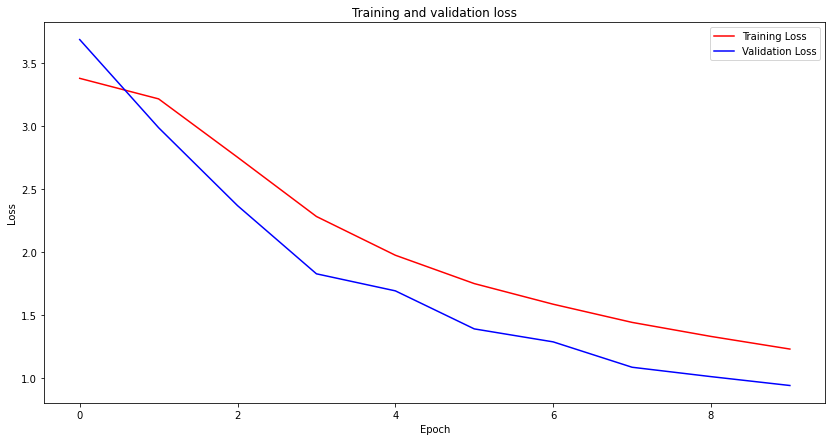

In [ ]:
# plotting training and validation loss against number of epochs
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
# evaluating the model's performance with test dataset
test_loss, test_acc = model_2_1l.evaluate(test_generator)
print('loss :' ,test_loss, 'acc :' ,test_acc)

272/272 [==============================] - 25s 91ms/step - loss: 0.9520 - accuracy: 0.7012
loss : 0.9520328640937805 acc : 0.7012181282043457


In [ ]:
# Viewing Precision, recall and f1-score for each of the label
# getting the predicted labels
predictions = model_2_1l.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1)

# getting the true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

272/272 [==============================] - 25s 90ms/step
              precision    recall  f1-score   support

           A       0.94      0.23      0.37       600
           B       0.77      0.82      0.79       600
           C       0.98      0.93      0.95       600
           D       0.59      0.97      0.73       600
           E       0.51      0.78      0.62       600
           F       0.85      0.87      0.86       600
           G       0.84      0.85      0.84       600
           H       0.85      0.89      0.87       600
           I       0.80      0.82      0.81       602
           J       0.94      0.84      0.89       600
           K       0.70      0.90      0.79       600
           L       0.91      0.74      0.82       600
           M       0.70      0.56      0.62       600
           N       0.97      0.50      0.66       602
           O       0.59      0.77      0.67       600
           P       0.75      0.89      0.82       600
           Q       0.90 

<Figure size 3600x3600 with 0 Axes>

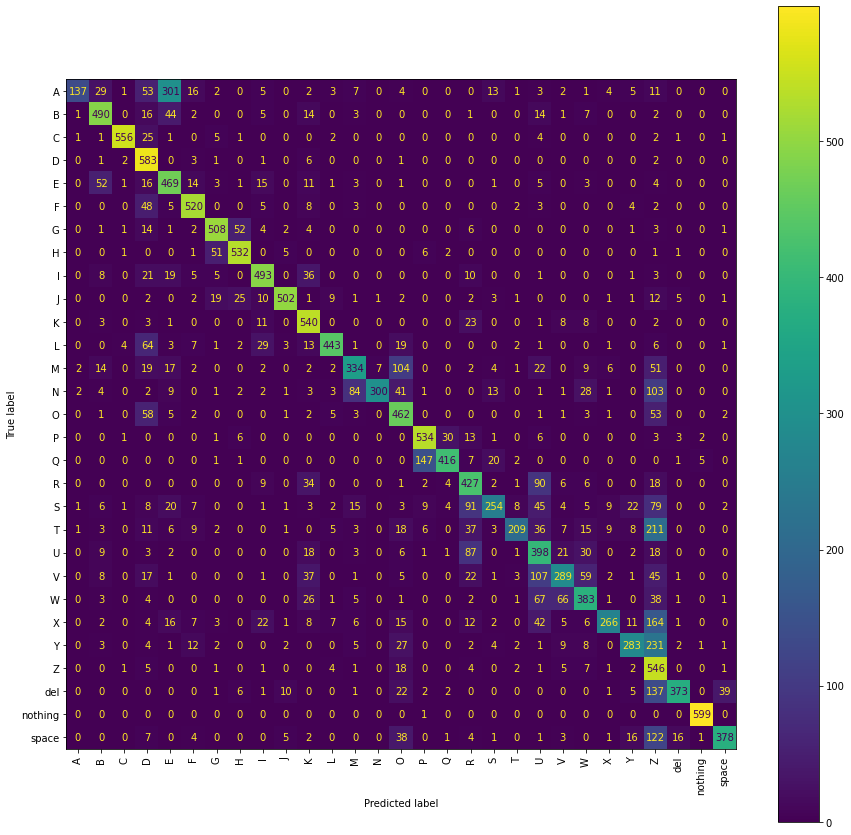

In [ ]:
# plotting the confusion matrix
plt.figure(figsize=(50,50))
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,xticks_rotation='vertical')

#### **Kernel size - (4,4)**

In [ ]:
# defining the model
model_3_1l = Sequential()

model_3_1l.add(Conv2D(32, kernel_size=(4,4), input_shape=target_dims))
model_3_1l.add(Activation('relu'))
model_3_1l.add(MaxPooling2D((2, 2)))
model_3_1l.add(Dropout(0.5))

model_3_1l.add(Flatten())
model_3_1l.add(Dropout(0.5))

model_3_1l.add(Dense(128, activation='swish'))

model_3_1l.add(Dense(num_classes, activation='softmax'))

model_3_1l.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        1568      
                                                                 
 activation_2 (Activation)   (None, 61, 61, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dropout_3 (Dropout)         (None, 28800)             0         
                                                      

In [ ]:
# defining the Early Stopping policy
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
# compiling the model
model_3_1l.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting the model
model_3_1l.fit(train_generator, validation_data = validation_generator, epochs=10,verbose=1)

Epoch 1/10
952/952 [==============================] - 99s 103ms/step - loss: 3.2852 - accuracy: 0.0856 - val_loss: 2.9110 - val_accuracy: 0.1789
Epoch 2/10
952/952 [==============================] - 98s 103ms/step - loss: 2.6559 - accuracy: 0.2260 - val_loss: 2.1497 - val_accuracy: 0.3798
Epoch 3/10
952/952 [==============================] - 98s 103ms/step - loss: 2.1480 - accuracy: 0.3410 - val_loss: 1.7449 - val_accuracy: 0.4676
Epoch 4/10
952/952 [==============================] - 98s 103ms/step - loss: 1.7606 - accuracy: 0.4434 - val_loss: 1.3858 - val_accuracy: 0.5826
Epoch 5/10
952/952 [==============================] - 97s 102ms/step - loss: 1.4785 - accuracy: 0.5268 - val_loss: 1.1527 - val_accuracy: 0.6294
Epoch 6/10
952/952 [==============================] - 98s 103ms/step - loss: 1.2752 - accuracy: 0.5872 - val_loss: 0.9931 - val_accuracy: 0.6919
Epoch 7/10
952/952 [==============================] - 98s 103ms/step - loss: 1.1260 - accuracy: 0.6328 - val_loss: 0.8517 - val_ac

In [ ]:
# viewing the model history of loss, accuracy, val_loss, val_accuracy
metrics = pd.DataFrame(model_3_1l.history.history)
print("The model metrics are")
display(metrics)

The model metrics are


loss  accuracy  val_loss  val_accuracy
0  3.285200  0.085645  2.911038      0.178924
1  2.655852  0.226024  2.149682      0.379798
2  2.147994  0.340956  1.744931      0.467594
3  1.760648  0.443363  1.385808      0.582625
4  1.478516  0.526808  1.152747      0.629396
5  1.275219  0.587172  0.993093      0.691910
6  1.125983  0.632810  0.851652      0.737417
7  1.002922  0.669403  0.778867      0.756263
8  0.908234  0.700200  0.707031      0.772466
9  0.821802  0.727025  0.596806      0.821420

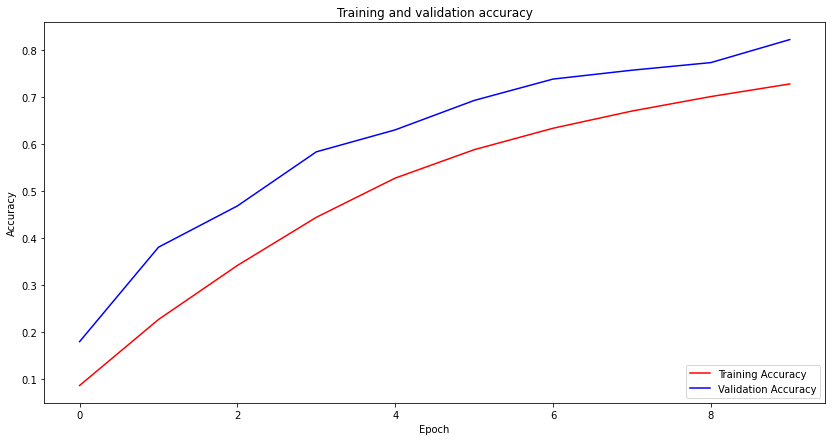

In [ ]:
# plotting training and validation accuracy against number of epochs
acc= model_3_1l.history.history['accuracy']
val_acc= model_3_1l.history.history['val_accuracy']
loss= model_3_1l.history.history['loss']
val_loss= model_3_1l.history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

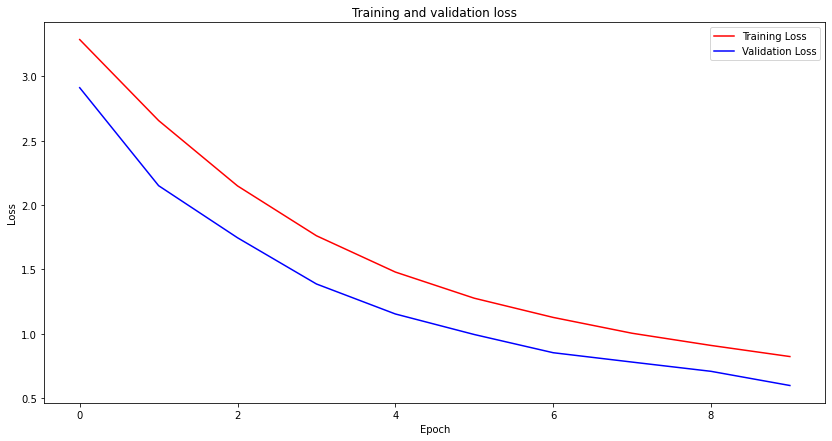

In [ ]:
# plotting training and validation loss against number of epochs
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
# evaluating the model's performance with test dataset
test_loss, test_acc = model_3_1l.evaluate(test_generator)
print('loss :' ,test_loss, 'acc :' ,test_acc)

272/272 [==============================] - 25s 91ms/step - loss: 0.5943 - accuracy: 0.8176
loss : 0.5942786931991577 acc : 0.8176281452178955


In [ ]:
# Viewing Precision, recall and f1-score for each of the label
# getting the predicted labels
predictions = model_3_1l.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1)

# getting the true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

272/272 [==============================] - 25s 90ms/step
              precision    recall  f1-score   support

           A       0.77      0.88      0.82       600
           B       0.87      0.90      0.88       600
           C       0.98      0.95      0.97       600
           D       0.92      0.93      0.92       600
           E       0.84      0.79      0.81       600
           F       0.93      0.94      0.94       600
           G       0.81      0.92      0.86       600
           H       0.92      0.81      0.87       600
           I       0.95      0.87      0.91       602
           J       0.95      0.93      0.94       600
           K       0.87      0.95      0.91       600
           L       1.00      0.89      0.94       600
           M       0.47      0.93      0.63       600
           N       0.96      0.53      0.68       602
           O       0.90      0.78      0.84       600
           P       0.95      0.78      0.86       600
           Q       0.81 

<Figure size 3600x3600 with 0 Axes>

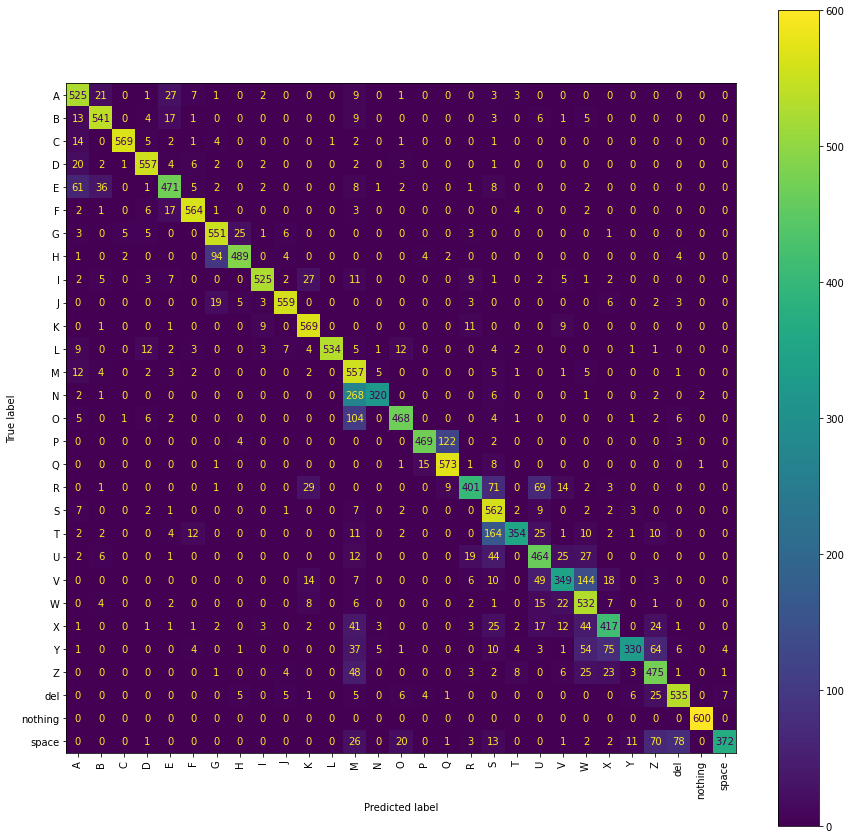

In [ ]:
# plotting the confusion matrix
plt.figure(figsize=(50,50))
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,xticks_rotation='vertical')

#### **Kernel size - (6,6)**

In [ ]:
# defining the model
model_4_1l = Sequential()

model_4_1l.add(Conv2D(32, kernel_size=(6,6), input_shape=target_dims))
model_4_1l.add(Activation('relu'))
model_4_1l.add(MaxPooling2D((2, 2)))
model_4_1l.add(Dropout(0.5))

model_4_1l.add(Flatten())
model_4_1l.add(Dropout(0.5))

model_4_1l.add(Dense(128, activation='swish'))

model_4_1l.add(Dense(num_classes, activation='softmax'))

model_4_1l.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 59, 59, 32)        3488      
                                                                 
 activation_3 (Activation)   (None, 59, 59, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 26912)             0         
                                                                 
 dropout_5 (Dropout)         (None, 26912)             0         
                                                      

In [ ]:
# defining the Early Stopping policy
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
# compiling the model
model_4_1l.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting the model
model_4_1l.fit(train_generator, validation_data = validation_generator, epochs=10,verbose=1)

Epoch 1/10
952/952 [==============================] - 99s 103ms/step - loss: 3.3544 - accuracy: 0.0498 - val_loss: 3.2269 - val_accuracy: 0.0981
Epoch 2/10
952/952 [==============================] - 98s 103ms/step - loss: 2.9570 - accuracy: 0.1607 - val_loss: 2.4775 - val_accuracy: 0.2665
Epoch 3/10
952/952 [==============================] - 98s 103ms/step - loss: 2.3930 - accuracy: 0.2832 - val_loss: 1.9048 - val_accuracy: 0.4331
Epoch 4/10
952/952 [==============================] - 98s 103ms/step - loss: 1.9914 - accuracy: 0.3856 - val_loss: 1.6192 - val_accuracy: 0.4994
Epoch 5/10
952/952 [==============================] - 98s 103ms/step - loss: 1.7122 - accuracy: 0.4654 - val_loss: 1.3834 - val_accuracy: 0.5960
Epoch 6/10
952/952 [==============================] - 99s 104ms/step - loss: 1.5054 - accuracy: 0.5225 - val_loss: 1.2171 - val_accuracy: 0.6172
Epoch 7/10
952/952 [==============================] - 99s 103ms/step - loss: 1.3598 - accuracy: 0.5700 - val_loss: 1.0823 - val_ac

In [ ]:
# viewing the model history of loss, accuracy, val_loss, val_accuracy
metrics = pd.DataFrame(model_4_1l.history.history)
print("The model metrics are")
display(metrics)

The model metrics are


loss  accuracy  val_loss  val_accuracy
0  3.354442  0.049841  3.226910      0.098138
1  2.957016  0.160735  2.477471      0.266490
2  2.392982  0.283153  1.904764      0.433119
3  1.991434  0.385593  1.619209      0.499425
4  1.712180  0.465394  1.383422      0.595955
5  1.505392  0.522507  1.217082      0.617214
6  1.359792  0.570033  1.082254      0.656746
7  1.242455  0.602193  0.987297      0.683291
8  1.149220  0.626079  0.816542      0.763618
9  1.078744  0.649440  0.744279      0.777752

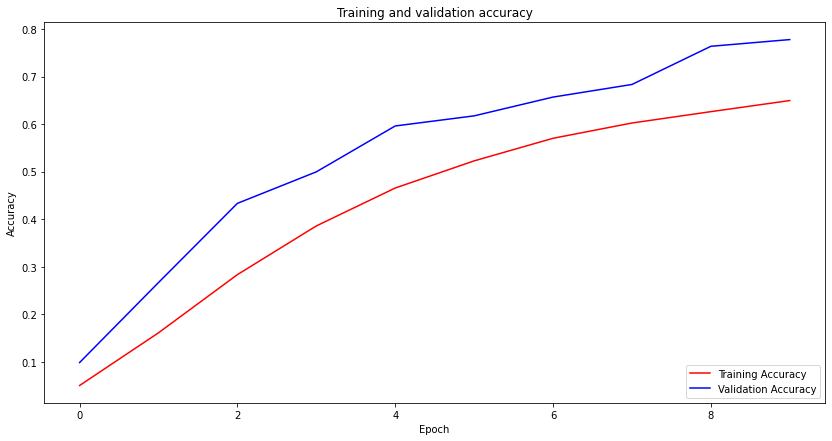

In [ ]:
# plotting training and validation accuracy against number of epochs
acc= model_4_1l.history.history['accuracy']
val_acc= model_4_1l.history.history['val_accuracy']
loss= model_4_1l.history.history['loss']
val_loss= model_4_1l.history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

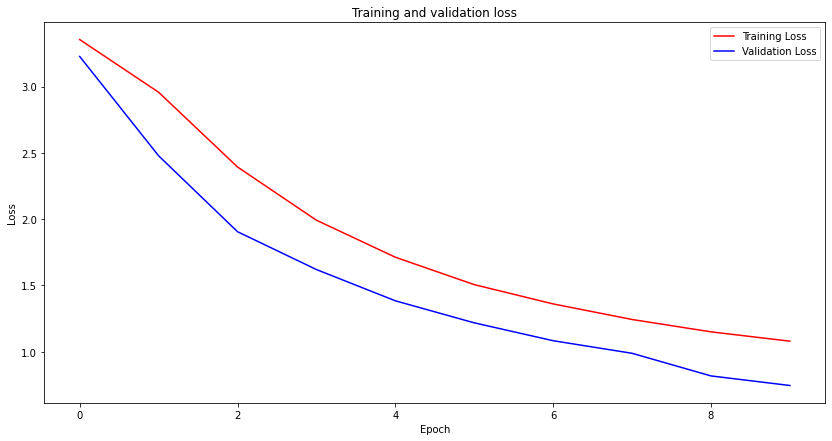

In [ ]:
# plotting training and validation loss against number of epochs
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
# evaluating the model's performance with test dataset
test_loss, test_acc = model_4_1l.evaluate(test_generator)
print('loss :' ,test_loss, 'acc :' ,test_acc)

272/272 [==============================] - 25s 92ms/step - loss: 0.7500 - accuracy: 0.7730
loss : 0.7499698996543884 acc : 0.7730406522750854


In [ ]:
# Viewing Precision, recall and f1-score for each of the label
# getting the predicted labels
predictions = model_4_1l.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1)

# getting the true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

272/272 [==============================] - 25s 90ms/step
              precision    recall  f1-score   support

           A       0.80      0.78      0.79       600
           B       0.80      0.91      0.85       600
           C       0.96      0.98      0.97       600
           D       0.88      0.91      0.89       600
           E       0.81      0.68      0.74       600
           F       0.93      0.90      0.91       600
           G       0.90      0.79      0.84       600
           H       0.80      0.96      0.87       600
           I       0.89      0.87      0.88       602
           J       0.95      0.89      0.92       600
           K       0.86      0.85      0.86       600
           L       0.81      0.97      0.89       600
           M       0.70      0.79      0.74       600
           N       0.79      0.80      0.80       602
           O       0.95      0.67      0.79       600
           P       0.53      0.97      0.68       600
           Q       0.91 

<Figure size 3600x3600 with 0 Axes>

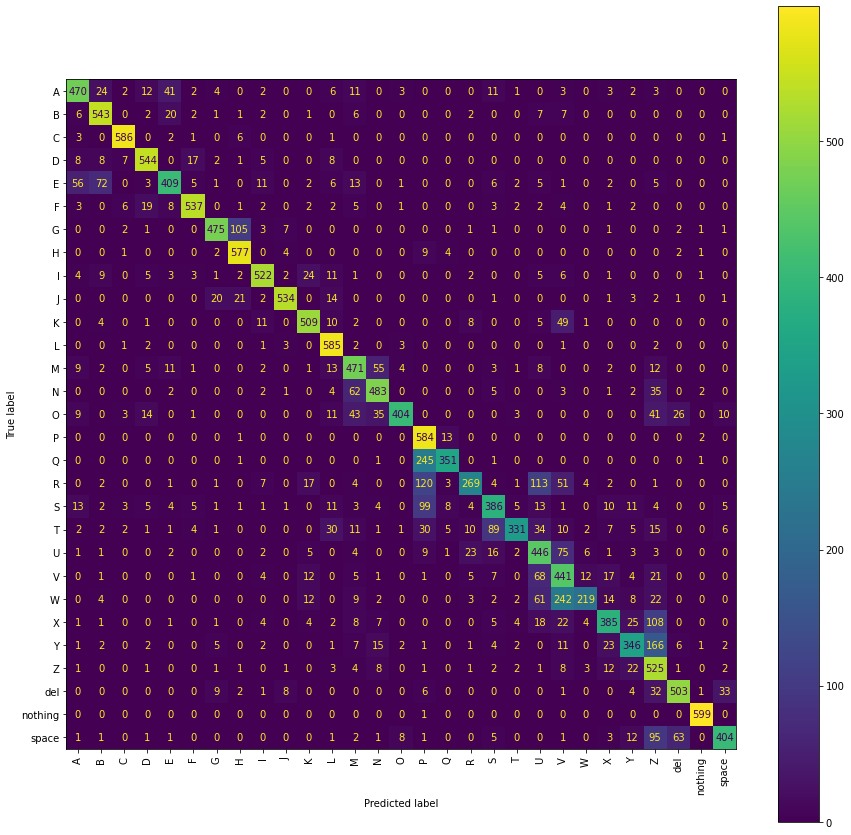

In [ ]:
# plotting the confusion matrix
plt.figure(figsize=(50,50))
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,xticks_rotation='vertical')

#### **Kernel size - (8,8)**

In [ ]:
# defining the model
model_5_1l = Sequential()

model_5_1l.add(Conv2D(32, kernel_size=(8,8), input_shape=target_dims))
model_5_1l.add(Activation('relu'))
model_5_1l.add(MaxPooling2D((2, 2)))
model_5_1l.add(Dropout(0.5))

model_5_1l.add(Flatten())
model_5_1l.add(Dropout(0.5))

model_5_1l.add(Dense(128, activation='swish'))

model_5_1l.add(Dense(num_classes, activation='softmax'))

model_5_1l.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 57, 57, 32)        6176      
                                                                 
 activation_4 (Activation)   (None, 57, 57, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_7 (Dropout)         (None, 25088)             0         
                                                      

In [ ]:
# defining the Early Stopping policy
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
# compiling the model
model_5_1l.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting the model
model_5_1l.fit(train_generator, validation_data = validation_generator, epochs=10,verbose=1)

Epoch 1/10
952/952 [==============================] - 100s 104ms/step - loss: 3.3647 - accuracy: 0.0396 - val_loss: 3.2686 - val_accuracy: 0.1062
Epoch 2/10
952/952 [==============================] - 99s 104ms/step - loss: 3.0998 - accuracy: 0.1277 - val_loss: 2.7081 - val_accuracy: 0.2100
Epoch 3/10
952/952 [==============================] - 99s 104ms/step - loss: 2.6899 - accuracy: 0.2134 - val_loss: 2.3358 - val_accuracy: 0.3029
Epoch 4/10
952/952 [==============================] - 99s 104ms/step - loss: 2.3836 - accuracy: 0.2938 - val_loss: 1.9805 - val_accuracy: 0.4040
Epoch 5/10
952/952 [==============================] - 98s 103ms/step - loss: 2.0737 - accuracy: 0.3671 - val_loss: 1.7671 - val_accuracy: 0.4606
Epoch 6/10
952/952 [==============================] - 98s 103ms/step - loss: 1.8780 - accuracy: 0.4191 - val_loss: 1.4623 - val_accuracy: 0.5634
Epoch 7/10
952/952 [==============================] - 99s 104ms/step - loss: 1.7103 - accuracy: 0.4671 - val_loss: 1.3141 - val_a

In [ ]:
# viewing the model history of loss, accuracy, val_loss, val_accuracy
metrics = pd.DataFrame(model_5_1l.history.history)
print("The model metrics are")
display(metrics)

The model metrics are


loss  accuracy  val_loss  val_accuracy
0  3.364712  0.039630  3.268649      0.106182
1  3.099815  0.127737  2.708070      0.209952
2  2.689908  0.213416  2.335820      0.302919
3  2.383582  0.293808  1.980483      0.404045
4  2.073676  0.367091  1.767139      0.460584
5  1.877974  0.419148  1.462344      0.563434
6  1.710255  0.467052  1.314068      0.624799
7  1.577588  0.509456  1.216692      0.633647
8  1.465917  0.540615  1.137151      0.653298
9  1.398717  0.557540  1.068260      0.687658

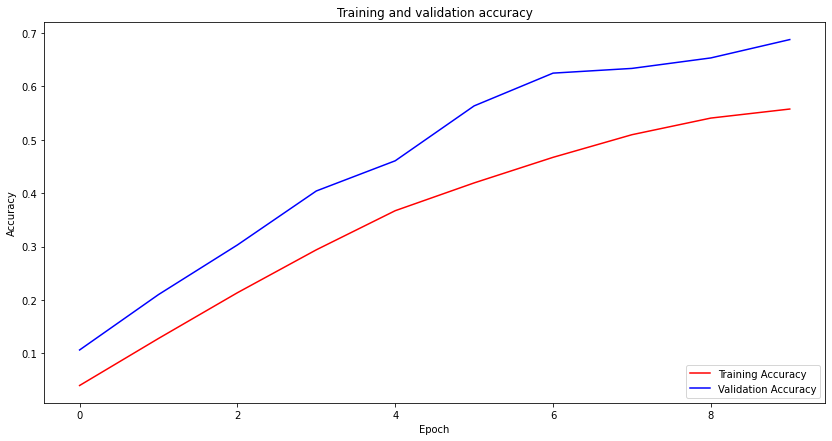

In [ ]:
# plotting training and validation accuracy against number of epochs
acc= model_5_1l.history.history['accuracy']
val_acc= model_5_1l.history.history['val_accuracy']
loss= model_5_1l.history.history['loss']
val_loss= model_5_1l.history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

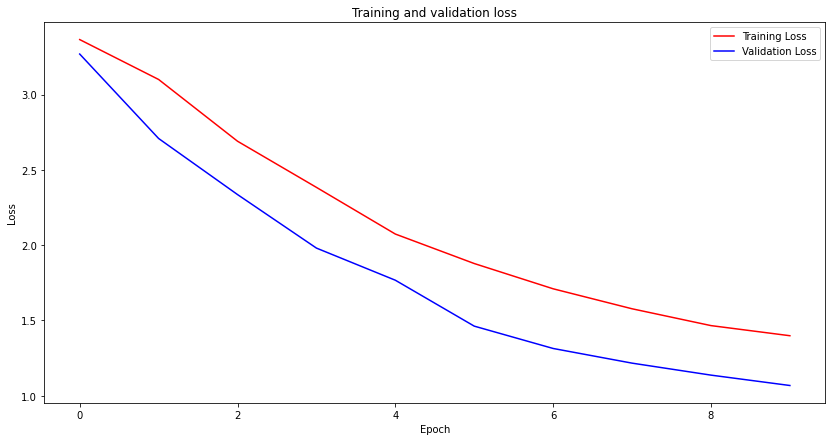

In [ ]:
# plotting training and validation loss against number of epochs
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
# evaluating the model's performance with test dataset
test_loss, test_acc = model_5_1l.evaluate(test_generator)
print('loss :' ,test_loss, 'acc :' ,test_acc)

272/272 [==============================] - 25s 91ms/step - loss: 1.0793 - accuracy: 0.6820
loss : 1.0793107748031616 acc : 0.6819696426391602


In [ ]:
# Viewing Precision, recall and f1-score for each of the label
# getting the predicted labels
predictions = model_5_1l.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1)

# getting the true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

272/272 [==============================] - 25s 90ms/step
              precision    recall  f1-score   support

           A       0.68      0.74      0.71       600
           B       0.90      0.73      0.81       600
           C       0.83      0.96      0.89       600
           D       0.82      0.77      0.79       600
           E       0.80      0.49      0.61       600
           F       0.67      0.86      0.75       600
           G       0.81      0.77      0.79       600
           H       0.80      0.87      0.83       600
           I       0.82      0.78      0.80       602
           J       0.70      0.92      0.79       600
           K       0.84      0.77      0.81       600
           L       0.75      0.84      0.79       600
           M       0.77      0.54      0.63       600
           N       0.68      0.81      0.74       602
           O       0.91      0.48      0.63       600
           P       0.71      0.79      0.75       600
           Q       0.73 

<Figure size 3600x3600 with 0 Axes>

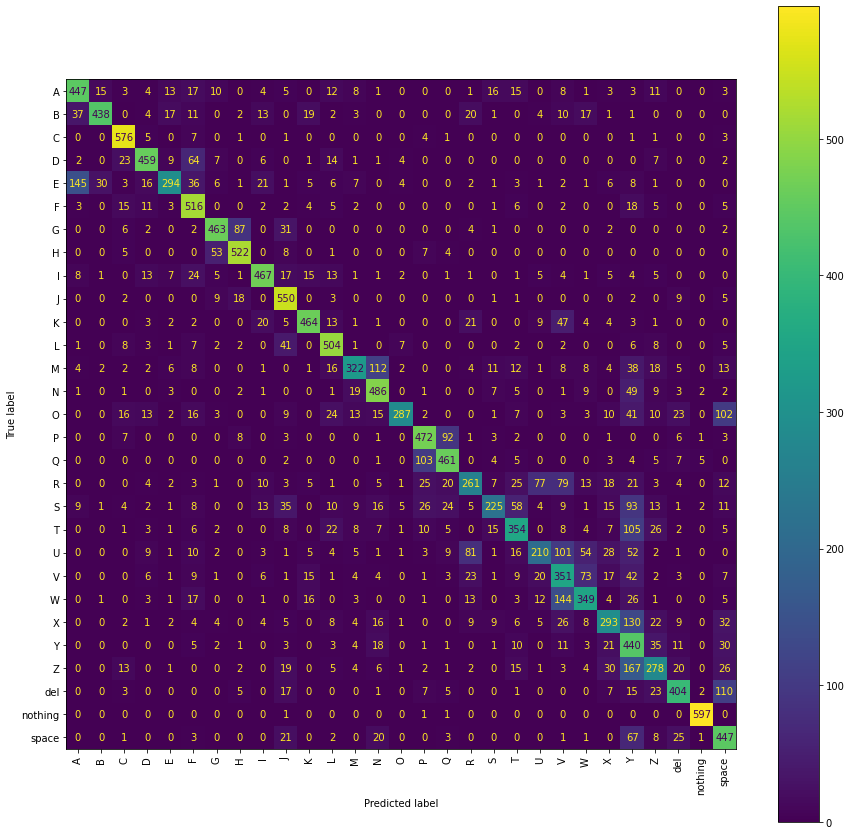

In [ ]:
# plotting the confusion matrix
plt.figure(figsize=(50,50))
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,xticks_rotation='vertical')

## **CNN Models with 2 Convolutional layers, 2 Maxpooling layers and 2 Dropout layers**

#### **Kernel size - (5,5)**

In [ ]:
# defining the model
model_1_2l = Sequential()

model_1_2l.add(Conv2D(32, kernel_size=(5,5), input_shape=target_dims))
model_1_2l.add(Activation('relu'))
model_1_2l.add(MaxPooling2D((2, 2)))
model_1_2l.add(Dropout(0.5))

model_1_2l.add(Conv2D(32, kernel_size=(5,5), input_shape=target_dims))
model_1_2l.add(Activation('relu'))
model_1_2l.add(MaxPooling2D((2, 2)))
model_1_2l.add(Dropout(0.5))

model_1_2l.add(Flatten())
model_1_2l.add(Dropout(0.5))

model_1_2l.add(Dense(128, activation='swish'))

model_1_2l.add(Dense(num_classes, activation='softmax'))

model_1_2l.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation_1 (Activation)   (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        25632     
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                        

In [ ]:
# defining the Early Stopping policy
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
# compiling the model
model_1_2l.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting the model
model_1_2l.fit(train_generator, validation_data = validation_generator, epochs=10,verbose=1)

Epoch 1/10
952/952 [==============================] - 103s 99ms/step - loss: 3.3799 - accuracy: 0.0223 - val_loss: 3.3675 - val_accuracy: 0.0345
Epoch 2/10
952/952 [==============================] - 93s 98ms/step - loss: 3.3826 - accuracy: 0.0248 - val_loss: 3.3672 - val_accuracy: 0.0361
Epoch 3/10
952/952 [==============================] - 91s 96ms/step - loss: 3.3724 - accuracy: 0.0345 - val_loss: 3.3422 - val_accuracy: 0.0487
Epoch 4/10
952/952 [==============================] - 93s 98ms/step - loss: 3.3087 - accuracy: 0.0681 - val_loss: 3.1976 - val_accuracy: 0.1047
Epoch 5/10
952/952 [==============================] - 93s 97ms/step - loss: 3.1023 - accuracy: 0.1214 - val_loss: 2.8524 - val_accuracy: 0.1567
Epoch 6/10
952/952 [==============================] - 95s 100ms/step - loss: 2.6954 - accuracy: 0.2058 - val_loss: 2.3173 - val_accuracy: 0.2928
Epoch 7/10
952/952 [==============================] - 93s 98ms/step - loss: 2.3024 - accuracy: 0.2971 - val_loss: 2.0340 - val_accurac

In [ ]:
# viewing the model history of loss, accuracy, val_loss, val_accuracy
metrics = pd.DataFrame(model_1_2l.history.history)
print("The model metrics are")
display(metrics)

The model metrics are


loss  accuracy  val_loss  val_accuracy
0  3.379938  0.022261  3.367525      0.034475
1  3.382648  0.024789  3.367221      0.036084
2  3.372387  0.034524  3.342165      0.048724
3  3.308694  0.068080  3.197584      0.104689
4  3.102254  0.121401  2.852382      0.156746
5  2.695380  0.205848  2.317262      0.292806
6  2.302370  0.297140  2.033977      0.409561
7  1.992145  0.384920  1.548923      0.542634
8  1.785192  0.441015  1.349932      0.588256
9  1.600775  0.495765  1.239889      0.631809

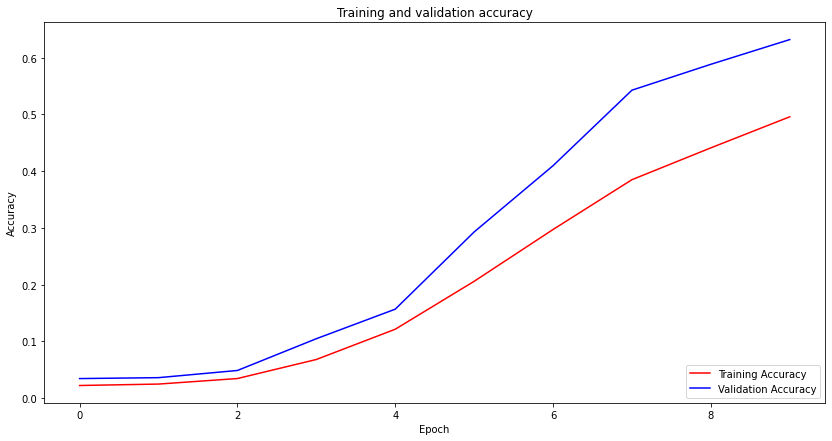

In [ ]:
# plotting training and validation accuracy against number of epochs
acc= model_1_2l.history.history['accuracy']
val_acc= model_1_2l.history.history['val_accuracy']
loss= model_1_2l.history.history['loss']
val_loss= model_1_2l.history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

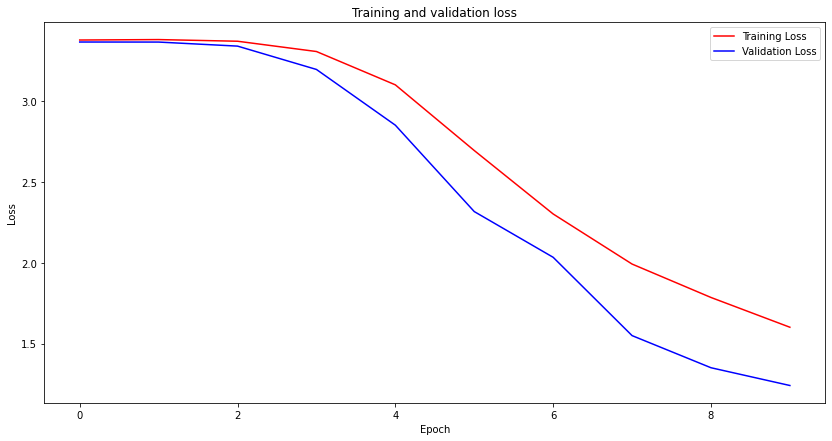

In [ ]:
# plotting training and validation loss against number of epochs
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
# evaluating the model's performance with test dataset
test_loss, test_acc = model_1_2l.evaluate(test_generator)
print('loss :' ,test_loss, 'acc :' ,test_acc)

272/272 [==============================] - 23s 86ms/step - loss: 1.2573 - accuracy: 0.6183
loss : 1.257338285446167 acc : 0.6183061599731445


In [ ]:
# Viewing Precision, recall and f1-score for each of the label
# getting the predicted labels
predictions = model_1_2l.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1)

# getting the true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

272/272 [==============================] - 23s 86ms/step
              precision    recall  f1-score   support

           A       0.82      0.23      0.36       600
           B       0.68      0.77      0.72       600
           C       0.95      0.90      0.92       600
           D       0.66      0.91      0.77       600
           E       0.50      0.72      0.59       600
           F       0.85      0.78      0.81       600
           G       0.85      0.77      0.81       600
           H       0.87      0.84      0.85       600
           I       0.68      0.74      0.71       602
           J       0.90      0.57      0.70       600
           K       0.66      0.83      0.74       600
           L       0.91      0.68      0.78       600
           M       0.50      0.64      0.56       600
           N       0.95      0.25      0.40       602
           O       0.76      0.65      0.70       600
           P       0.72      0.57      0.64       600
           Q       0.73 

<Figure size 3600x3600 with 0 Axes>

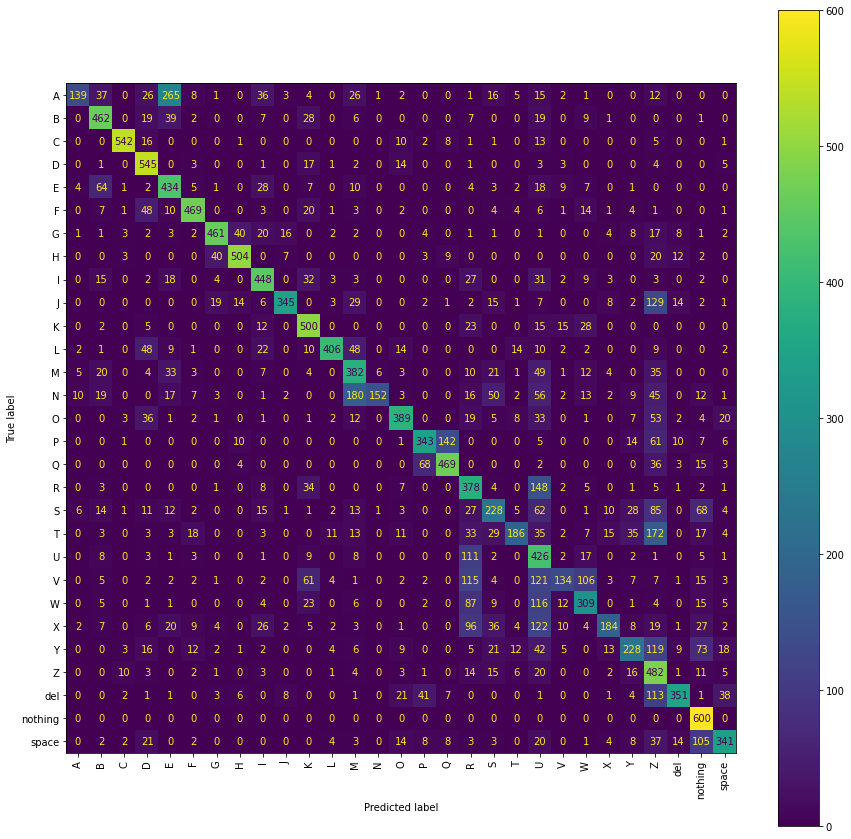

In [ ]:
# plotting the confusion matrix
plt.figure(figsize=(50,50))
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,xticks_rotation='vertical')

#### **Kernel size - (7,7)**

In [ ]:
# defining the model
model_2_2l = Sequential()

model_2_2l.add(Conv2D(32, kernel_size=(7,7), input_shape=target_dims))
model_2_2l.add(Activation('relu'))
model_2_2l.add(MaxPooling2D((2, 2)))
model_2_2l.add(Dropout(0.5))

model_2_2l.add(Conv2D(32, kernel_size=(7,7), input_shape=target_dims))
model_2_2l.add(Activation('relu'))
model_2_2l.add(MaxPooling2D((2, 2)))
model_2_2l.add(Dropout(0.5))

model_2_2l.add(Flatten())
model_2_2l.add(Dropout(0.5))

model_2_2l.add(Dense(128, activation='swish'))

model_2_2l.add(Dense(num_classes, activation='softmax'))

model_2_2l.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 58, 58, 32)        4736      
                                                                 
 activation_3 (Activation)   (None, 58, 58, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 32)        50208     
                                                                 
 activation_4 (Activation)   (None, 23, 23, 32)        0         
                                                      

In [ ]:
# defining the Early Stopping policy
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
# compiling the model
model_2_2l.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting the model
model_2_2l.fit(train_generator, validation_data = validation_generator, epochs=10,verbose=1)

Epoch 1/10
952/952 [==============================] - 94s 98ms/step - loss: 3.3810 - accuracy: 0.0296 - val_loss: 3.3648 - val_accuracy: 0.0429
Epoch 2/10
952/952 [==============================] - 93s 97ms/step - loss: 3.3758 - accuracy: 0.0242 - val_loss: 3.3549 - val_accuracy: 0.0560
Epoch 3/10
952/952 [==============================] - 93s 98ms/step - loss: 3.3109 - accuracy: 0.0621 - val_loss: 3.2168 - val_accuracy: 0.0992
Epoch 4/10
952/952 [==============================] - 95s 99ms/step - loss: 3.1519 - accuracy: 0.1131 - val_loss: 3.0232 - val_accuracy: 0.1318
Epoch 5/10
952/952 [==============================] - 93s 98ms/step - loss: 2.8862 - accuracy: 0.1662 - val_loss: 2.5880 - val_accuracy: 0.2453
Epoch 6/10
952/952 [==============================] - 93s 98ms/step - loss: 2.5636 - accuracy: 0.2363 - val_loss: 2.3193 - val_accuracy: 0.3162
Epoch 7/10
952/952 [==============================] - 93s 98ms/step - loss: 2.3162 - accuracy: 0.2957 - val_loss: 2.0620 - val_accuracy:

In [ ]:
# viewing the model history of loss, accuracy, val_loss, val_accuracy
metrics = pd.DataFrame(model_2_2l.history.history)
print("The model metrics are")
display(metrics)

The model metrics are


loss  accuracy  val_loss  val_accuracy
0  3.380971  0.029599  3.364807      0.042864
1  3.375779  0.024165  3.354897      0.055964
2  3.310901  0.062088  3.216788      0.099173
3  3.151884  0.113094  3.023183      0.131809
4  2.886199  0.166152  2.587976      0.245346
5  2.563590  0.236333  2.319343      0.316249
6  2.316220  0.295728  2.061970      0.386578
7  2.135021  0.342713  1.739435      0.481613
8  1.951882  0.393555  1.631963      0.518616
9  1.818151  0.428128  1.493251      0.555964

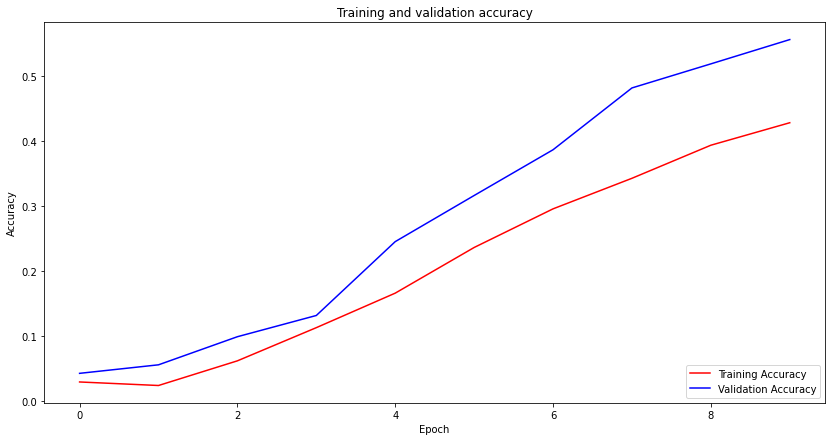

In [ ]:
# plotting training and validation accuracy against number of epochs
acc= model_2_2l.history.history['accuracy']
val_acc= model_2_2l.history.history['val_accuracy']
loss= model_2_2l.history.history['loss']
val_loss= model_2_2l.history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

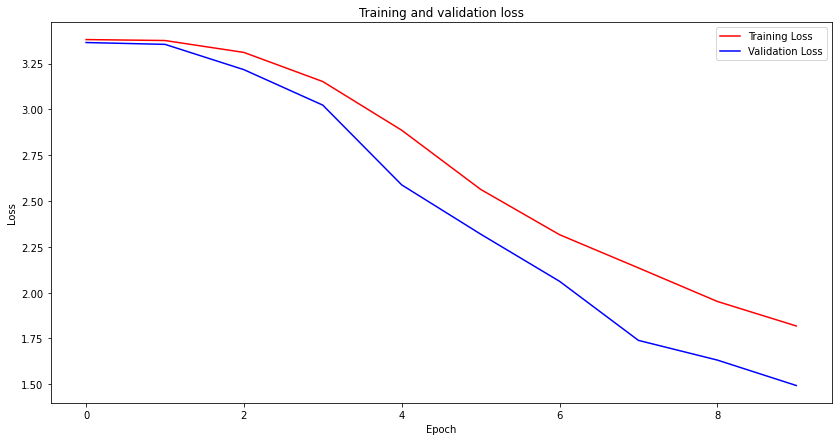

In [ ]:
# plotting training and validation loss against number of epochs
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
# evaluating the model's performance with test dataset
test_loss, test_acc = model_2_2l.evaluate(test_generator)
print('loss :' ,test_loss, 'acc :' ,test_acc)

272/272 [==============================] - 23s 86ms/step - loss: 1.4883 - accuracy: 0.5463
loss : 1.4882547855377197 acc : 0.5463111996650696


In [ ]:
# Viewing Precision, recall and f1-score for each of the label
# getting the predicted labels
predictions = model_2_2l.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1)

# getting the true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

272/272 [==============================] - 23s 85ms/step
              precision    recall  f1-score   support

           A       0.41      0.69      0.52       600
           B       0.51      0.78      0.62       600
           C       0.93      0.87      0.90       600
           D       0.83      0.69      0.75       600
           E       0.56      0.39      0.46       600
           F       0.82      0.66      0.73       600
           G       0.75      0.61      0.67       600
           H       0.79      0.75      0.77       600
           I       0.76      0.44      0.56       602
           J       0.73      0.57      0.64       600
           K       0.60      0.56      0.58       600
           L       0.92      0.54      0.68       600
           M       0.28      0.52      0.37       600
           N       0.51      0.21      0.30       602
           O       0.84      0.35      0.50       600
           P       0.81      0.59      0.68       600
           Q       0.54 

<Figure size 3600x3600 with 0 Axes>

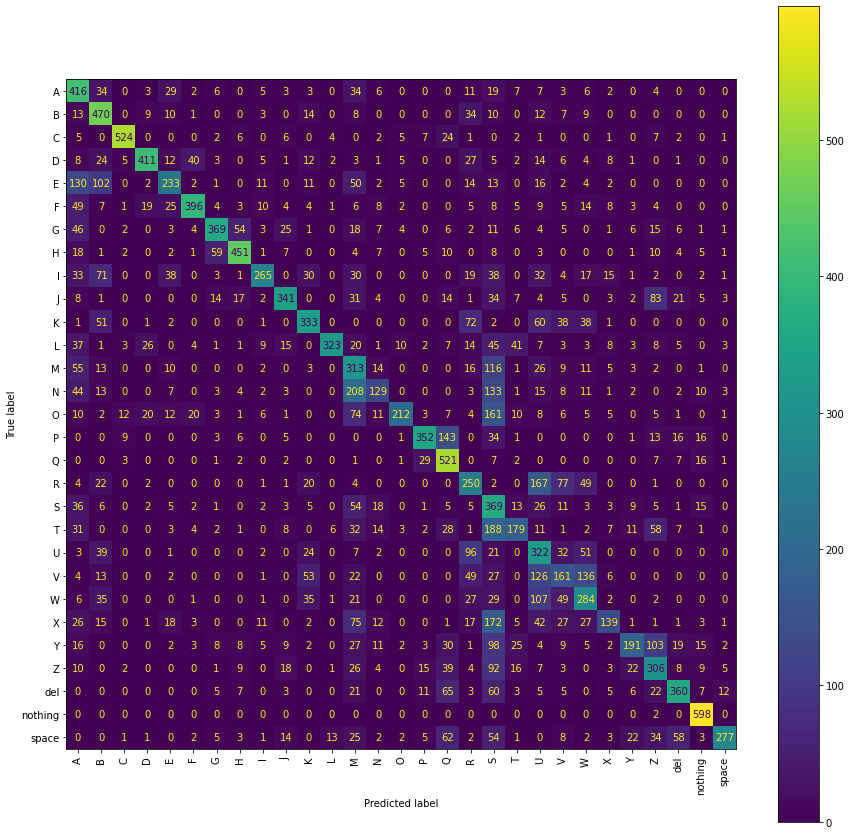

In [ ]:
# plotting the confusion matrix
plt.figure(figsize=(50,50))
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,xticks_rotation='vertical')

#### **Kernel size - (4,4)**

In [ ]:
# defining the model
model_3_2l = Sequential()

model_3_2l.add(Conv2D(32, kernel_size=(4,4), input_shape=target_dims))
model_3_2l.add(Activation('relu'))
model_3_2l.add(MaxPooling2D((2, 2)))
model_3_2l.add(Dropout(0.5))

model_3_2l.add(Conv2D(32, kernel_size=(4,4), input_shape=target_dims))
model_3_2l.add(Activation('relu'))
model_3_2l.add(MaxPooling2D((2, 2)))
model_3_2l.add(Dropout(0.5))

model_3_2l.add(Flatten())
model_3_2l.add(Dropout(0.5))

model_3_2l.add(Dense(128, activation='swish'))

model_3_2l.add(Dense(num_classes, activation='softmax'))

model_3_2l.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        1568      
                                                                 
 activation_5 (Activation)   (None, 61, 61, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 32)        16416     
                                                                 
 activation_6 (Activation)   (None, 27, 27, 32)        0         
                                                      

In [ ]:
# defining the Early Stopping policy
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
# compiling the model
model_3_2l.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting the model
model_3_2l.fit(train_generator, validation_data = validation_generator, epochs=10,verbose=1)

Epoch 1/10
952/952 [==============================] - 93s 97ms/step - loss: 3.3768 - accuracy: 0.0235 - val_loss: 3.3659 - val_accuracy: 0.0345
Epoch 2/10
952/952 [==============================] - 93s 97ms/step - loss: 3.3202 - accuracy: 0.0583 - val_loss: 3.1401 - val_accuracy: 0.1313
Epoch 3/10
952/952 [==============================] - 93s 97ms/step - loss: 2.9636 - accuracy: 0.1525 - val_loss: 2.6213 - val_accuracy: 0.2570
Epoch 4/10
952/952 [==============================] - 93s 98ms/step - loss: 2.5437 - accuracy: 0.2468 - val_loss: 2.1575 - val_accuracy: 0.3737
Epoch 5/10
952/952 [==============================] - 93s 98ms/step - loss: 2.1689 - accuracy: 0.3406 - val_loss: 1.6840 - val_accuracy: 0.5149
Epoch 6/10
952/952 [==============================] - 93s 98ms/step - loss: 1.8593 - accuracy: 0.4196 - val_loss: 1.3813 - val_accuracy: 0.5985
Epoch 7/10
952/952 [==============================] - 92s 97ms/step - loss: 1.6377 - accuracy: 0.4848 - val_loss: 1.2378 - val_accuracy:

In [ ]:
# viewing the model history of loss, accuracy, val_loss, val_accuracy
metrics = pd.DataFrame(model_3_2l.history.history)
print("The model metrics are")
display(metrics)

The model metrics are


loss  accuracy  val_loss  val_accuracy
0  3.376830  0.023459  3.365896      0.034475
1  3.320237  0.058279  3.140134      0.131349
2  2.963593  0.152461  2.621321      0.256952
3  2.543741  0.246840  2.157524      0.373707
4  2.168931  0.340644  1.684027      0.514939
5  1.859251  0.419559  1.381289      0.598483
6  1.637667  0.484798  1.237784      0.614342
7  1.456050  0.533244  1.031183      0.682372
8  1.340274  0.564386  0.902838      0.741209
9  1.236825  0.597629  0.780443      0.773730

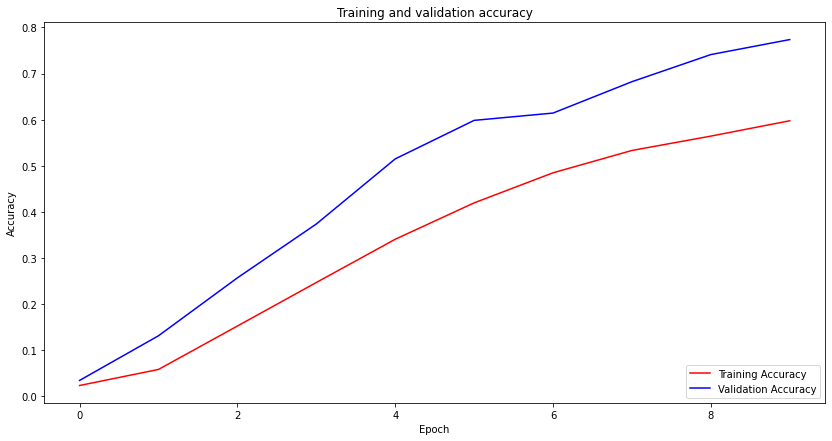

In [ ]:
# plotting training and validation accuracy against number of epochs
acc= model_3_2l.history.history['accuracy']
val_acc= model_3_2l.history.history['val_accuracy']
loss= model_3_2l.history.history['loss']
val_loss= model_3_2l.history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

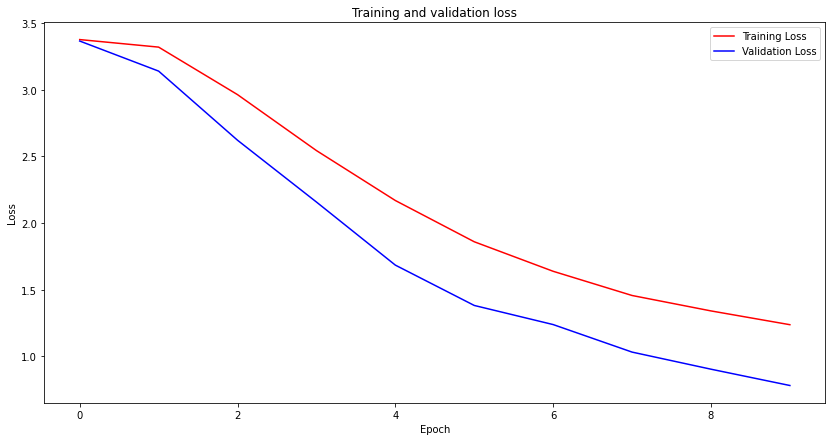

In [ ]:
# plotting training and validation loss against number of epochs
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
# evaluating the model's performance with test dataset
test_loss, test_acc = model_3_2l.evaluate(test_generator)
print('loss :' ,test_loss, 'acc :' ,test_acc)

272/272 [==============================] - 23s 85ms/step - loss: 0.7823 - accuracy: 0.7733
loss : 0.7823074460029602 acc : 0.7733279466629028


In [ ]:
# Viewing Precision, recall and f1-score for each of the label
# getting the predicted labels
predictions = model_3_2l.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1)

# getting the true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

272/272 [==============================] - 23s 84ms/step
              precision    recall  f1-score   support

           A       0.80      0.74      0.77       600
           B       0.71      0.91      0.79       600
           C       0.98      0.96      0.97       600
           D       0.93      0.88      0.91       600
           E       0.80      0.62      0.70       600
           F       0.97      0.91      0.94       600
           G       0.91      0.75      0.82       600
           H       0.73      0.97      0.83       600
           I       0.78      0.81      0.80       602
           J       0.96      0.78      0.86       600
           K       0.68      0.86      0.76       600
           L       0.83      0.96      0.89       600
           M       0.57      0.81      0.67       600
           N       0.77      0.73      0.75       602
           O       0.94      0.83      0.88       600
           P       0.61      0.95      0.75       600
           Q       0.93 

<Figure size 3600x3600 with 0 Axes>

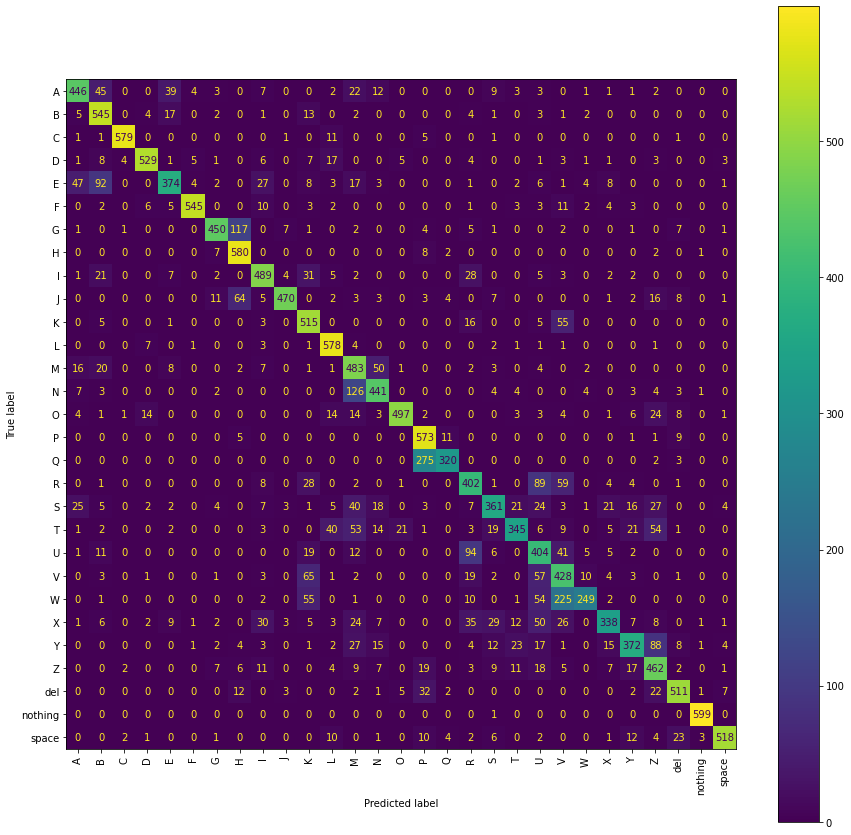

In [ ]:
# plotting the confusion matrix
plt.figure(figsize=(50,50))
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,xticks_rotation='vertical')

#### **Kernel size - (6,6)**

In [ ]:
# defining the model
model_4_2l = Sequential()

model_4_2l.add(Conv2D(32, kernel_size=(6,6), input_shape=target_dims))
model_4_2l.add(Activation('relu'))
model_4_2l.add(MaxPooling2D((2, 2)))
model_4_2l.add(Dropout(0.5))

model_4_2l.add(Conv2D(32, kernel_size=(6,6), input_shape=target_dims))
model_4_2l.add(Activation('relu'))
model_4_2l.add(MaxPooling2D((2, 2)))
model_4_2l.add(Dropout(0.5))

model_4_2l.add(Flatten())
model_4_2l.add(Dropout(0.5))

model_4_2l.add(Dense(128, activation='swish'))

model_4_2l.add(Dense(num_classes, activation='softmax'))

model_4_2l.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 59, 59, 32)        3488      
                                                                 
 activation_7 (Activation)   (None, 59, 59, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        36896     
                                                                 
 activation_8 (Activation)   (None, 24, 24, 32)        0         
                                                      

In [ ]:
# defining the Early Stopping policy
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
# compiling the model
model_4_2l.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting the model
model_4_2l.fit(train_generator, validation_data = validation_generator, epochs=10,verbose=1)

Epoch 1/10
952/952 [==============================] - 93s 97ms/step - loss: 3.3770 - accuracy: 0.0300 - val_loss: 3.3675 - val_accuracy: 0.0345
Epoch 2/10
952/952 [==============================] - 93s 97ms/step - loss: 3.3742 - accuracy: 0.0189 - val_loss: 3.3676 - val_accuracy: 0.0345
Epoch 3/10
952/952 [==============================] - 93s 97ms/step - loss: 3.3735 - accuracy: 0.0258 - val_loss: 3.3676 - val_accuracy: 0.0339
Epoch 4/10
952/952 [==============================] - 93s 98ms/step - loss: 3.3723 - accuracy: 0.0222 - val_loss: 3.3680 - val_accuracy: 0.0345
Epoch 5/10
952/952 [==============================] - 93s 97ms/step - loss: 3.3486 - accuracy: 0.0433 - val_loss: 3.2736 - val_accuracy: 0.0680
Epoch 6/10
952/952 [==============================] - 95s 100ms/step - loss: 3.1762 - accuracy: 0.1021 - val_loss: 2.9786 - val_accuracy: 0.1617
Epoch 7/10
952/952 [==============================] - 93s 98ms/step - loss: 2.8889 - accuracy: 0.1632 - val_loss: 2.6093 - val_accuracy

In [ ]:
# viewing the model history of loss, accuracy, val_loss, val_accuracy
metrics = pd.DataFrame(model_4_2l.history.history)
print("The model metrics are")
display(metrics)

The model metrics are


loss  accuracy  val_loss  val_accuracy
0  3.376993  0.029977  3.367480      0.034475
1  3.374236  0.018912  3.367599      0.034475
2  3.373483  0.025758  3.367559      0.033900
3  3.372337  0.022162  3.367959      0.034475
4  3.348590  0.043291  3.273620      0.068030
5  3.176241  0.102128  2.978623      0.161687
6  2.888908  0.163197  2.609259      0.257757
7  2.566363  0.240355  2.196277      0.361641
8  2.273048  0.309174  1.963460      0.414732
9  2.069312  0.360426  1.670278      0.519306

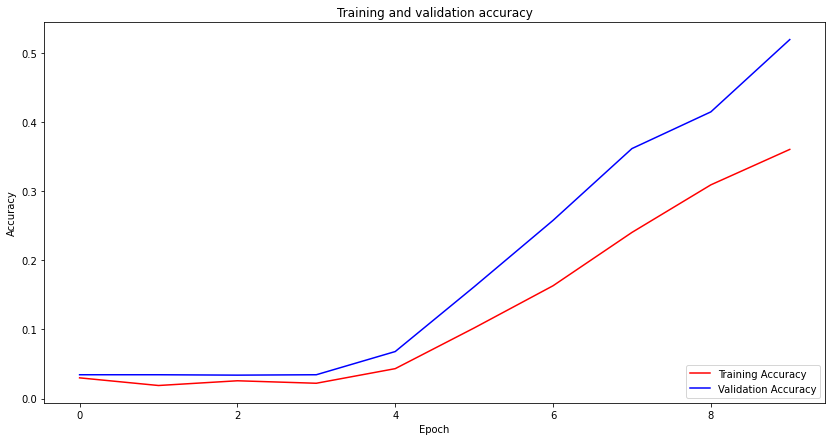

In [ ]:
# plotting training and validation accuracy against number of epochs
acc= model_4_2l.history.history['accuracy']
val_acc= model_4_2l.history.history['val_accuracy']
loss= model_4_2l.history.history['loss']
val_loss= model_4_2l.history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

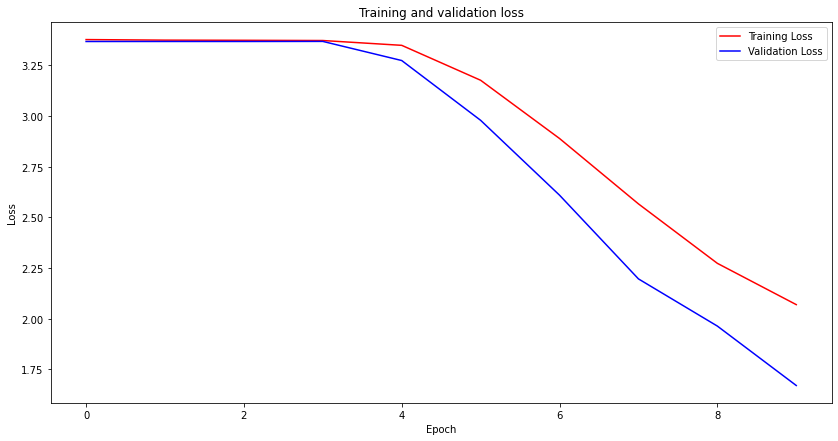

In [ ]:
# plotting training and validation loss against number of epochs
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
# evaluating the model's performance with test dataset
test_loss, test_acc = model_4_2l.evaluate(test_generator)
print('loss :' ,test_loss, 'acc :' ,test_acc)

272/272 [==============================] - 23s 86ms/step - loss: 1.6764 - accuracy: 0.5141
loss : 1.6764131784439087 acc : 0.5140772461891174


In [ ]:
# Viewing Precision, recall and f1-score for each of the label
# getting the predicted labels
predictions = model_4_2l.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1)

# getting the true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

272/272 [==============================] - 23s 86ms/step
              precision    recall  f1-score   support

           A       0.64      0.52      0.57       600
           B       0.77      0.59      0.67       600
           C       0.81      0.91      0.86       600
           D       0.66      0.58      0.62       600
           E       0.65      0.39      0.49       600
           F       0.72      0.66      0.69       600
           G       0.75      0.40      0.52       600
           H       0.63      0.81      0.71       600
           I       0.63      0.51      0.57       602
           J       0.57      0.65      0.61       600
           K       0.45      0.66      0.54       600
           L       0.67      0.72      0.69       600
           M       0.48      0.50      0.49       600
           N       0.69      0.39      0.50       602
           O       0.80      0.38      0.52       600
           P       0.58      0.59      0.58       600
           Q       0.64 

<Figure size 3600x3600 with 0 Axes>

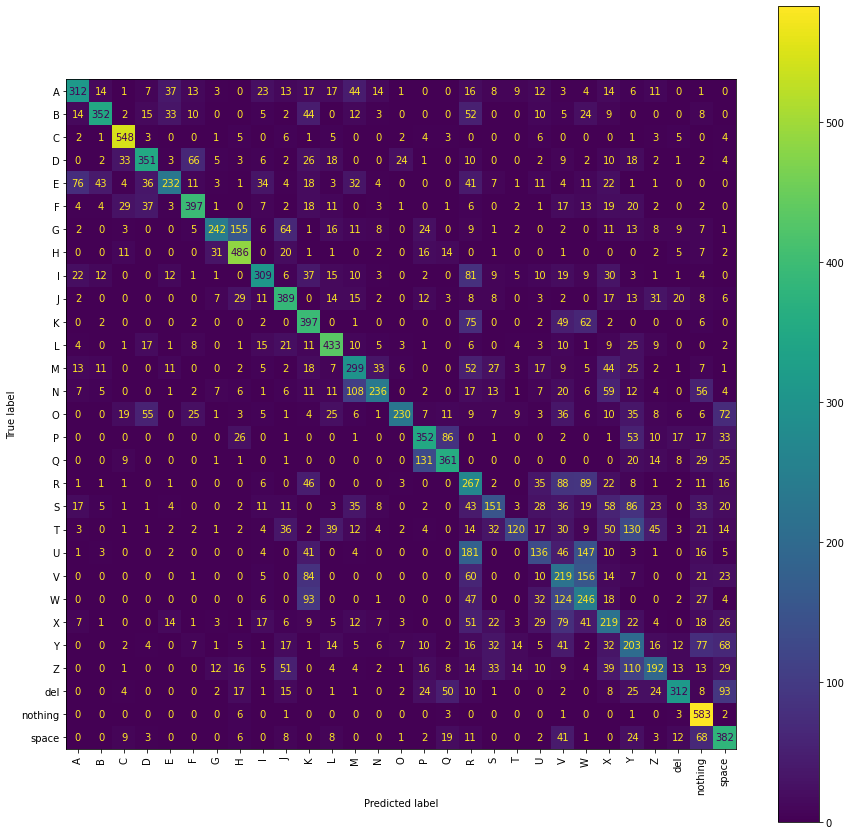

In [ ]:
# plotting the confusion matrix
plt.figure(figsize=(50,50))
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,xticks_rotation='vertical')

#### **Kernel size - (8,8)**

In [ ]:
# defining the model
model_5_2l = Sequential()

model_5_2l.add(Conv2D(32, kernel_size=(8,8), input_shape=target_dims))
model_5_2l.add(Activation('relu'))
model_5_2l.add(MaxPooling2D((2, 2)))
model_5_2l.add(Dropout(0.5))

model_5_2l.add(Conv2D(32, kernel_size=(8,8), input_shape=target_dims))
model_5_2l.add(Activation('relu'))
model_5_2l.add(MaxPooling2D((2, 2)))
model_5_2l.add(Dropout(0.5))

model_5_2l.add(Flatten())
model_5_2l.add(Dropout(0.5))

model_5_2l.add(Dense(128, activation='swish'))

model_5_2l.add(Dense(num_classes, activation='softmax'))

model_5_2l.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 57, 57, 32)        6176      
                                                                 
 activation_9 (Activation)   (None, 57, 57, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 21, 21, 32)        65568     
                                                                 
 activation_10 (Activation)  (None, 21, 21, 32)        0         
                                                      

In [ ]:
# defining the Early Stopping policy
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
# compiling the model
model_5_2l.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting the model
model_5_2l.fit(train_generator, validation_data = validation_generator, epochs=10,verbose=1)

Epoch 1/10
952/952 [==============================] - 94s 98ms/step - loss: 3.3743 - accuracy: 0.0264 - val_loss: 3.3675 - val_accuracy: 0.0345
Epoch 2/10
952/952 [==============================] - 94s 99ms/step - loss: 3.3756 - accuracy: 0.0265 - val_loss: 3.3679 - val_accuracy: 0.0345
Epoch 3/10
952/952 [==============================] - 94s 99ms/step - loss: 3.3722 - accuracy: 0.0259 - val_loss: 3.3677 - val_accuracy: 0.0346
Epoch 4/10
952/952 [==============================] - 93s 98ms/step - loss: 3.3727 - accuracy: 0.0214 - val_loss: 3.3676 - val_accuracy: 0.0345
Epoch 5/10
952/952 [==============================] - 93s 98ms/step - loss: 3.3730 - accuracy: 0.0311 - val_loss: 3.3676 - val_accuracy: 0.0347
Epoch 6/10
952/952 [==============================] - 93s 98ms/step - loss: 3.3756 - accuracy: 0.0286 - val_loss: 3.3591 - val_accuracy: 0.0429
Epoch 7/10
952/952 [==============================] - 94s 98ms/step - loss: 3.3273 - accuracy: 0.0492 - val_loss: 3.2967 - val_accuracy:

In [ ]:
# viewing the model history of loss, accuracy, val_loss, val_accuracy
metrics = pd.DataFrame(model_5_2l.history.history)
print("The model metrics are")
display(metrics)

The model metrics are


loss  accuracy  val_loss  val_accuracy
0  3.374293  0.026414  3.367526      0.034475
1  3.375619  0.026513  3.367872      0.034475
2  3.372212  0.025938  3.367684      0.034590
3  3.372714  0.021358  3.367643      0.034475
4  3.372968  0.031109  3.367595      0.034705
5  3.375633  0.028631  3.359130      0.042864
6  3.327328  0.049201  3.296748      0.055504
7  3.227830  0.083249  3.196183      0.096185
8  3.119244  0.113110  3.086199      0.129166
9  3.012885  0.135191  2.852467      0.188118

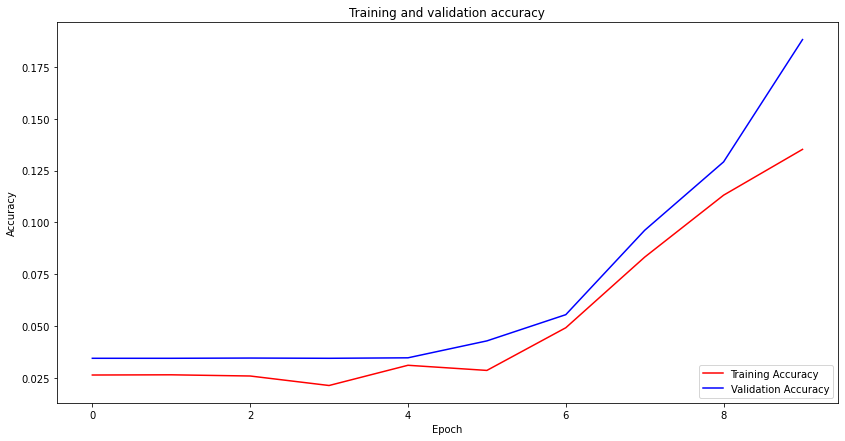

In [ ]:
# plotting training and validation accuracy against number of epochs
acc= model_5_2l.history.history['accuracy']
val_acc= model_5_2l.history.history['val_accuracy']
loss= model_5_2l.history.history['loss']
val_loss= model_5_2l.history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

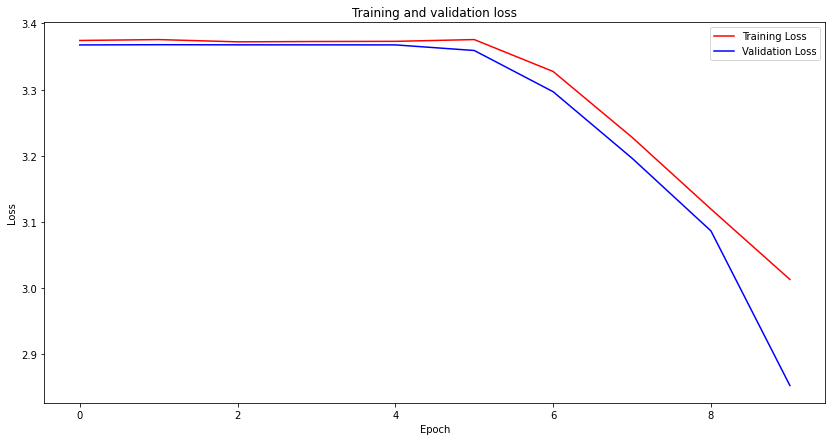

In [ ]:
# plotting training and validation loss against number of epochs
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
# evaluating the model's performance with test dataset
test_loss, test_acc = model_5_2l.evaluate(test_generator)
print('loss :' ,test_loss, 'acc :' ,test_acc)

272/272 [==============================] - 23s 86ms/step - loss: 2.8572 - accuracy: 0.1854
loss : 2.857238531112671 acc : 0.18541714549064636


In [ ]:
# Viewing Precision, recall and f1-score for each of the label
# getting the predicted labels
predictions = model_5_2l.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1)

# getting the true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

272/272 [==============================] - 23s 86ms/step
              precision    recall  f1-score   support

           A       0.24      0.04      0.06       600
           B       0.15      0.34      0.20       600
           C       0.37      0.68      0.48       600
           D       0.25      0.41      0.31       600
           E       0.29      0.16      0.21       600
           F       0.24      0.32      0.28       600
           G       0.42      0.15      0.22       600
           H       0.13      0.60      0.22       600
           I       0.12      0.06      0.08       602
           J       0.20      0.07      0.11       600
           K       0.11      0.37      0.17       600
           L       0.25      0.00      0.01       600
           M       0.10      0.04      0.06       600
           N       0.12      0.26      0.16       602
           O       0.48      0.04      0.08       600
           P       0.53      0.26      0.35       600
           Q       0.35 

<Figure size 3600x3600 with 0 Axes>

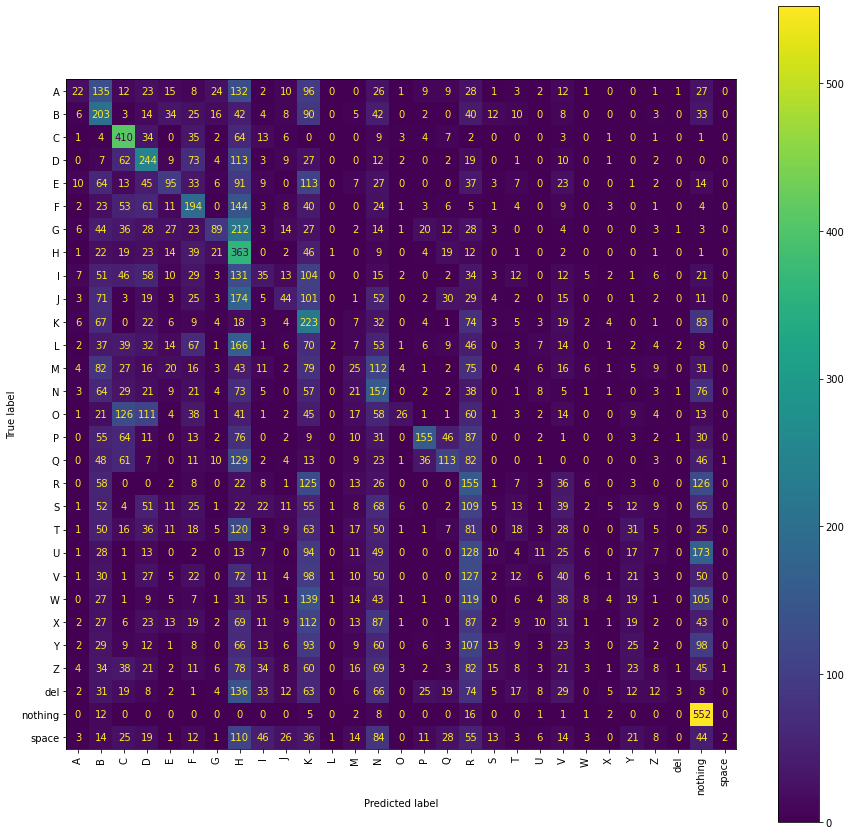

In [ ]:
# plotting the confusion matrix
plt.figure(figsize=(50,50))
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,xticks_rotation='vertical')